#### df가 원본 데이터
#### data가 유전자ID 열만 모아놓은 것
    batch와 Condition 열은 제외함.

In [1]:
import pandas as pd
import csv
import numpy

df = pd.read_table('../dataFile/201126/Colon_merged_273samples.txt')

print("Contion열 포함 Original 데이터 프레임 크기:", df.shape,"\n")    

#유전자 이름 list로
only_geneID=df.columns.tolist()[:-2] #제일 마지막 칼럼이 batch, 마지막에서 2번째 칼럼이 condition

# Condition-샘플 이름
condition_list=df['Condition'].tolist()
my_set = set(condition_list) #집합set으로 변환
sampleName = list(my_set) #list로 변환

print(sampleName)
print("샘플 종류",len(sampleName),"개\n")

# batch
batch_list=df['batch'].tolist()
batch_set = set(batch_list) #집합set으로 변환
batchName = list(batch_set) #list로 변환

print(batchName)
print("batch 개수",len(batchName),"개\n")


data=df.loc[:,only_geneID]

print("Condition열 뺀 유전자 발현도만 모아있는 데이터 프레임 크기:", data.shape)
data.head()
#df.head()

Contion열 포함 Original 데이터 프레임 크기: (273, 12979) 

[nan, 'Ca', 'Villous / tubulovillous adenoma', 'SSP', 'healthy colonic tissue', 'Colorectal adenocarcinoma', 'Control', 'sessile serrated adenoma', 'TSA', 'villoglandular polyp', 'tubulovillous adenoma', 'FAP', 'tubular adenoma', 'adenomatous polyp', 'tubulovillous polyp', 'SSA/P', 'villous adenoma', 'NS', 'serrated adenoma', 'Cancer', 'HP', 'AP', 'adenovillous polyp', 'Tubular adenoma', 'Tubulovillous adenoma']
샘플 종류 25 개

['batch1', 'batch4', 'batch3', 'batch2']
batch 개수 4 개

Condition열 뺀 유전자 발현도만 모아있는 데이터 프레임 크기: (273, 12977)


,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9984,9985,9986,9987,9988,9989,999,9990,9993,9994
N1,3.261926,5.542344,3.871889,3.798965,3.301909,4.530116,1.508158,4.371698,3.855534,3.944943,...,5.522298,3.817919,5.275173,6.938187,6.375326,6.390068,9.818748,6.252513,6.474137,4.038488
N2,3.067170,5.769222,3.409645,4.053349,3.064216,4.570496,2.211288,5.440883,3.927214,3.880498,...,5.620879,3.405323,5.440304,7.225440,6.498980,6.301897,9.471316,5.858419,6.450580,4.389834
N3,2.874421,6.154989,3.157981,4.017963,3.360651,4.594367,2.082090,5.156749,3.931030,3.788432,...,5.532340,3.314841,5.344373,7.032817,6.252114,6.623115,9.903985,5.728292,6.703466,4.215545
N4,3.604518,5.178568,3.842628,3.292021,3.171118,4.258140,1.870523,5.542925,4.368619,4.340705,...,4.772041,3.874741,5.722195,6.570667,5.843107,6.190442,9.685986,5.263290,6.751733,3.717602
N5,3.782860,5.516549,3.713573,3.300287,4.080469,4.280303,1.872678,5.634587,4.431263,4.287251,...,4.783519,4.029786,5.814754,6.793116,6.215238,5.985074,9.530748,5.507516,6.553576,3.735276


In [2]:
df.head()

,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9986,9987,9988,9989,999,9990,9993,9994,Condition,batch
N1,3.261926,5.542344,3.871889,3.798965,3.301909,4.530116,1.508158,4.371698,3.855534,3.944943,...,5.275173,6.938187,6.375326,6.390068,9.818748,6.252513,6.474137,4.038488,healthy colonic tissue,batch1
N2,3.067170,5.769222,3.409645,4.053349,3.064216,4.570496,2.211288,5.440883,3.927214,3.880498,...,5.440304,7.225440,6.498980,6.301897,9.471316,5.858419,6.450580,4.389834,healthy colonic tissue,batch1
N3,2.874421,6.154989,3.157981,4.017963,3.360651,4.594367,2.082090,5.156749,3.931030,3.788432,...,5.344373,7.032817,6.252114,6.623115,9.903985,5.728292,6.703466,4.215545,healthy colonic tissue,batch1
N4,3.604518,5.178568,3.842628,3.292021,3.171118,4.258140,1.870523,5.542925,4.368619,4.340705,...,5.722195,6.570667,5.843107,6.190442,9.685986,5.263290,6.751733,3.717602,healthy colonic tissue,batch1
N5,3.782860,5.516549,3.713573,3.300287,4.080469,4.280303,1.872678,5.634587,4.431263,4.287251,...,5.814754,6.793116,6.215238,5.985074,9.530748,5.507516,6.553576,3.735276,healthy colonic tissue,batch1


In [3]:
data.columns

Index(['1', '10', '100', '10000', '100009676', '10001', '10003', '10004',
       '100048912', '100049716',
       ...
       '9984', '9985', '9986', '9987', '9988', '9989', '999', '9990', '9993',
       '9994'],
      dtype='object', length=12977)

<b> 샘플 종류 파악하기 </b>

In [4]:
print(len(sampleName)) #질병 개수 106개
column=sampleName[:len(sampleName)+1]
sampleName

25


[nan,
 'Ca',
 'Villous / tubulovillous adenoma',
 'SSP',
 'healthy colonic tissue',
 'Colorectal adenocarcinoma',
 'Control',
 'sessile serrated adenoma',
 'TSA',
 'villoglandular polyp',
 'tubulovillous adenoma',
 'FAP',
 'tubular adenoma',
 'adenomatous polyp',
 'tubulovillous polyp',
 'SSA/P',
 'villous adenoma',
 'NS',
 'serrated adenoma',
 'Cancer',
 'HP',
 'AP',
 'adenovillous polyp',
 'Tubular adenoma',
 'Tubulovillous adenoma']

<b> 각 샘플별 개수 파악하기</b>

In [5]:
# 각 샘플별 개수 
for i in sampleName[1:]:
    print(i,"\t+",df.loc[df["Condition"] == i,:].shape[0])

Ca 	+ 2
Villous / tubulovillous adenoma 	+ 1
SSP 	+ 4
healthy colonic tissue 	+ 20
Colorectal adenocarcinoma 	+ 20
Control 	+ 20
sessile serrated adenoma 	+ 4
TSA 	+ 1
villoglandular polyp 	+ 1
tubulovillous adenoma 	+ 86
FAP 	+ 2
tubular adenoma 	+ 18
adenomatous polyp 	+ 9
tubulovillous polyp 	+ 2
SSA/P 	+ 21
villous adenoma 	+ 6
NS 	+ 2
serrated adenoma 	+ 5
Cancer 	+ 4
HP 	+ 10
AP 	+ 10
adenovillous polyp 	+ 4
Tubular adenoma 	+ 11
Tubulovillous adenoma 	+ 8


In [6]:
df.loc[df["Condition"].isna()] # df.loc[["SSP_4","SSP_8"],:] 같은 의미

,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9986,9987,9988,9989,999,9990,9993,9994,Condition,batch
SSP_4,2.678969,5.562394,3.009244,2.579101,3.352881,4.251693,1.820089,4.078985,3.464314,4.196016,...,5.551267,7.015986,6.271153,6.699406,9.993463,5.533864,6.425784,4.194093,NaN,batch2
SSP_8,3.388493,5.331305,4.425484,3.523969,2.994306,4.619105,2.220337,4.422534,2.871913,4.216557,...,5.486888,7.251910,6.791371,6.534864,9.337104,5.705262,6.101527,4.096965,NaN,batch2


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from pandas import DataFrame

# https://note.espriter.net/1326

#predict=pd.DataFrame(df['Condition'].tolist())
predict=df[['Condition']]
predict.columns=['predict']
predict.head()

,predict
N1,healthy colonic tissue
N2,healthy colonic tissue
N3,healthy colonic tissue
N4,healthy colonic tissue
N5,healthy colonic tissue


<b> 이름은 다른데, 같은 샘플들 합치기 </b>

healthy colonic tissue = control = NAN = NS <br>
Tubulovillous adenoma = Villous/Tubluovillous adenoma = tubulovillous polyp = tubulovillous adenoma <br>
sessile serrated adenoma = SSA/P = SSP <br> 
adenomatous polyp = AP <br>
Cancer = Ca = colorectal adenocarcinoma <br>

In [8]:
combine_sampleName=sampleName[:]
combine_sampleName

[nan,
 'Ca',
 'Villous / tubulovillous adenoma',
 'SSP',
 'healthy colonic tissue',
 'Colorectal adenocarcinoma',
 'Control',
 'sessile serrated adenoma',
 'TSA',
 'villoglandular polyp',
 'tubulovillous adenoma',
 'FAP',
 'tubular adenoma',
 'adenomatous polyp',
 'tubulovillous polyp',
 'SSA/P',
 'villous adenoma',
 'NS',
 'serrated adenoma',
 'Cancer',
 'HP',
 'AP',
 'adenovillous polyp',
 'Tubular adenoma',
 'Tubulovillous adenoma']

In [9]:
NS=['healthy colonic tissue', 'Control', 'NS']
print(NS[0])

for i in NS:
    predict.loc[predict["predict"] == i,:] = NS[0]

# NAN값인 샘플들 NS[0]으로 변경
predict.loc[["SSP_4"],"predict"]=NS[0]
predict.loc[["SSP_8"],"predict"]=NS[0]

# predict-샘플 이름
predict_list=predict['predict'].tolist()
predict_set = set(predict_list) #집합set으로 변환
combine_sampleName = list(predict_set) #list로 변환
combine_sampleName

healthy colonic tissue


C:\anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A va

['Ca',
 'Villous / tubulovillous adenoma',
 'SSP',
 'healthy colonic tissue',
 'Colorectal adenocarcinoma',
 'sessile serrated adenoma',
 'TSA',
 'villoglandular polyp',
 'tubulovillous adenoma',
 'FAP',
 'tubular adenoma',
 'adenomatous polyp',
 'tubulovillous polyp',
 'SSA/P',
 'villous adenoma',
 'serrated adenoma',
 'Cancer',
 'HP',
 'AP',
 'adenovillous polyp',
 'Tubular adenoma',
 'Tubulovillous adenoma']

In [10]:
TubA=['Tubulovillous adenoma', 'Villous / tubulovillous adenoma', 'tubulovillous polyp', 'tubulovillous adenoma', 'villous adenoma']
print(TubA[0])

for i in TubA:
    predict.loc[predict["predict"] == i,:] = TubA[0]
    
# predict-샘플 이름
predict_list=predict['predict'].tolist()
predict_set = set(predict_list) #집합set으로 변환
combine_sampleName = list(predict_set) #list로 변환
combine_sampleName

Tubulovillous adenoma


C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['adenovillous polyp',
 'Tubular adenoma',
 'Ca',
 'serrated adenoma',
 'sessile serrated adenoma',
 'TSA',
 'villoglandular polyp',
 'Tubulovillous adenoma',
 'SSP',
 'healthy colonic tissue',
 'FAP',
 'tubular adenoma',
 'adenomatous polyp',
 'Cancer',
 'Colorectal adenocarcinoma',
 'HP',
 'AP',
 'SSA/P']

In [11]:
SSP=['sessile serrated adenoma', 'SSA/P', 'SSP']
print(SSP[0])

for i in SSP:
    predict.loc[predict["predict"] == i,:] = SSP[0]
    
# predict-샘플 이름
predict_list=predict['predict'].tolist()
predict_set = set(predict_list) #집합set으로 변환
combine_sampleName = list(predict_set) #list로 변환
combine_sampleName

sessile serrated adenoma


C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['adenovillous polyp',
 'Tubular adenoma',
 'sessile serrated adenoma',
 'Ca',
 'serrated adenoma',
 'TSA',
 'villoglandular polyp',
 'Tubulovillous adenoma',
 'Cancer',
 'healthy colonic tissue',
 'FAP',
 'tubular adenoma',
 'adenomatous polyp',
 'HP',
 'Colorectal adenocarcinoma',
 'AP']

In [12]:
AP=['adenomatous polyp', 'AP']
print(AP[0])

for i in AP:
    predict.loc[predict["predict"] == i,:] = AP[0]
    
# predict-샘플 이름
predict_list=predict['predict'].tolist()
predict_set = set(predict_list) #집합set으로 변환
combine_sampleName = list(predict_set) #list로 변환
combine_sampleName

adenomatous polyp


C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['adenovillous polyp',
 'Tubular adenoma',
 'sessile serrated adenoma',
 'Ca',
 'serrated adenoma',
 'TSA',
 'villoglandular polyp',
 'Tubulovillous adenoma',
 'Cancer',
 'healthy colonic tissue',
 'FAP',
 'tubular adenoma',
 'adenomatous polyp',
 'HP',
 'Colorectal adenocarcinoma']

In [13]:
Cancer=['Cancer', 'Ca', 'Colorectal adenocarcinoma']
print(Cancer[0])

for i in Cancer:
    predict.loc[predict["predict"] == i,:] = Cancer[0]
    
# predict-샘플 이름
predict_list=predict['predict'].tolist()
predict_set = set(predict_list) #집합set으로 변환
combine_sampleName = list(predict_set) #list로 변환
combine_sampleName

Cancer


C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['adenovillous polyp',
 'Tubular adenoma',
 'sessile serrated adenoma',
 'serrated adenoma',
 'TSA',
 'villoglandular polyp',
 'Tubulovillous adenoma',
 'Cancer',
 'healthy colonic tissue',
 'FAP',
 'tubular adenoma',
 'adenomatous polyp',
 'HP']

In [14]:
TA=['tubular adenoma', 'Tubular adenoma']
print(TA[0])

for i in TA:
    predict.loc[predict["predict"] == i,:] = TA[0]
    
# predict-샘플 이름
predict_list=predict['predict'].tolist()
predict_set = set(predict_list) #집합set으로 변환
combine_sampleName = list(predict_set) #list로 변환
combine_sampleName

tubular adenoma


C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['adenovillous polyp',
 'sessile serrated adenoma',
 'serrated adenoma',
 'TSA',
 'villoglandular polyp',
 'Tubulovillous adenoma',
 'Cancer',
 'healthy colonic tissue',
 'tubular adenoma',
 'FAP',
 'adenomatous polyp',
 'HP']

<b> 합치고 난 최종 샘플 종류와 개수 </b>

In [15]:
for i in combine_sampleName:
    print(i,"\t+",predict.loc[predict["predict"] == i,:].shape[0])

adenovillous polyp 	+ 4
sessile serrated adenoma 	+ 29
serrated adenoma 	+ 5
TSA 	+ 1
villoglandular polyp 	+ 1
Tubulovillous adenoma 	+ 103
Cancer 	+ 26
healthy colonic tissue 	+ 44
tubular adenoma 	+ 29
FAP 	+ 2
adenomatous polyp 	+ 19
HP 	+ 10


## correlation 계산 
combine_sampleName 이용해서, 행 이름 구하기 <br>
합치기 전 dataframe인 data변수 이용해서, correlation 구하기 <br>
pearson correlation 먼저 구하기 <br>
그래도 안 나오면, spearman correlation 구하기 <br>

NS[0] # healthy colonic tissue <br>
TubA[0] # Tubulovillous adenoma <br>
SSP[0] # sessile serrated adenoma <br>
AP[0] # adenomatous polyp <br>
Cancer[0] # Cancer <br>
TA[0] # tubular adenoma <br>

In [16]:
# concatenate labels to df as a new column
r = pd.concat([data, predict],axis=1)

r.tail()

,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9985,9986,9987,9988,9989,999,9990,9993,9994,predict
SSA.P.17,3.168203,5.081238,4.153700,3.908562,3.001588,4.820424,2.375645,4.338708,2.365043,4.184505,...,4.138788,5.260717,7.384413,6.669456,7.059780,9.732668,5.865699,5.975860,4.325534,sessile serrated adenoma
SSA.P.18,3.410563,5.201103,4.187524,3.360113,3.153917,4.409013,1.234972,4.013469,3.833025,4.610452,...,3.597399,5.916054,6.762080,5.888897,5.929257,9.333012,5.110429,6.639432,3.561905,sessile serrated adenoma
SSA.P.19,3.406845,5.773570,3.531418,3.018848,3.639411,4.293574,1.231854,3.649411,2.929373,4.054895,...,4.221285,5.698377,6.888883,5.851999,6.271824,9.875977,5.694509,6.718095,3.601179,sessile serrated adenoma
SSA.P.20,4.509260,5.044354,4.378324,2.642289,3.138742,4.623012,1.817323,4.769140,4.351938,4.410926,...,4.085452,6.499885,6.110657,4.823076,5.800136,9.183178,3.784187,6.986361,2.433076,sessile serrated adenoma
SSA.P.21,2.730068,4.509664,3.548250,3.175807,3.477712,4.862594,1.629351,4.782584,2.797801,3.911247,...,4.495704,5.875531,6.724426,5.662410,7.044568,10.018633,5.732676,6.664638,4.152600,sessile serrated adenoma


In [17]:
# healthy colonic tissue
r_NS = r.loc[r["predict"] == NS[0],:]
r_NS.head() 

,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9985,9986,9987,9988,9989,999,9990,9993,9994,predict
N1,3.261926,5.542344,3.871889,3.798965,3.301909,4.530116,1.508158,4.371698,3.855534,3.944943,...,3.817919,5.275173,6.938187,6.375326,6.390068,9.818748,6.252513,6.474137,4.038488,healthy colonic tissue
N2,3.067170,5.769222,3.409645,4.053349,3.064216,4.570496,2.211288,5.440883,3.927214,3.880498,...,3.405323,5.440304,7.225440,6.498980,6.301897,9.471316,5.858419,6.450580,4.389834,healthy colonic tissue
N3,2.874421,6.154989,3.157981,4.017963,3.360651,4.594367,2.082090,5.156749,3.931030,3.788432,...,3.314841,5.344373,7.032817,6.252114,6.623115,9.903985,5.728292,6.703466,4.215545,healthy colonic tissue
N4,3.604518,5.178568,3.842628,3.292021,3.171118,4.258140,1.870523,5.542925,4.368619,4.340705,...,3.874741,5.722195,6.570667,5.843107,6.190442,9.685986,5.263290,6.751733,3.717602,healthy colonic tissue
N5,3.782860,5.516549,3.713573,3.300287,4.080469,4.280303,1.872678,5.634587,4.431263,4.287251,...,4.029786,5.814754,6.793116,6.215238,5.985074,9.530748,5.507516,6.553576,3.735276,healthy colonic tissue


In [18]:
# pearson 상관계수 구하기 
data_NS = r_NS[r_NS.columns.difference(['predict'])].T
df_corr_NS = data_NS.corr(method='pearson')
df_corr_NS.to_csv("corr_healthy_colonic_tissue.csv") # csv 파일로 correlation 값 저장 
df_corr_NS

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,CL.7,CL.8,CL.9,CL.10,HP.1,HP.2,HP.3,HP.4,HP.5,HP.6
N1,1.000000,0.978139,0.980484,0.933272,0.937999,0.941905,0.925024,0.965013,0.968760,0.970929,...,0.953019,0.953705,0.957121,0.954606,0.945259,0.932455,0.923489,0.933722,0.928118,0.906189
N2,0.978139,1.000000,0.978002,0.935615,0.950418,0.947708,0.935130,0.971575,0.961235,0.977839,...,0.958699,0.951008,0.953940,0.956661,0.947216,0.919883,0.913995,0.926472,0.916400,0.897281
N3,0.980484,0.978002,1.000000,0.941458,0.945916,0.945401,0.925427,0.967198,0.960315,0.971062,...,0.957015,0.958817,0.958672,0.956840,0.949267,0.930227,0.927407,0.934356,0.936728,0.904877
N4,0.933272,0.935615,0.941458,1.000000,0.981717,0.985484,0.978620,0.964071,0.955484,0.958111,...,0.921345,0.940167,0.910014,0.920429,0.940332,0.900688,0.920536,0.909427,0.911138,0.915305
N5,0.937999,0.950418,0.945916,0.981717,1.000000,0.983393,0.980428,0.972033,0.955254,0.965461,...,0.932920,0.942349,0.918631,0.928624,0.946717,0.894055,0.912119,0.905682,0.906818,0.903156
N6,0.941905,0.947708,0.945401,0.985484,0.983393,1.000000,0.980663,0.972671,0.964391,0.970067,...,0.928789,0.942497,0.917633,0.925461,0.943230,0.902137,0.916817,0.911243,0.908659,0.916844
N7,0.925024,0.935130,0.925427,0.978620,0.980428,0.980663,1.000000,0.958980,0.947761,0.955187,...,0.916061,0.929806,0.899237,0.920839,0.940786,0.891364,0.910892,0.898119,0.890711,0.905630
N8,0.965013,0.971575,0.967198,0.964071,0.972033,0.972671,0.958980,1.000000,0.975616,0.984502,...,0.956150,0.954615,0.946245,0.953447,0.955857,0.922903,0.919502,0.928653,0.927144,0.917857
N9,0.968760,0.961235,0.960315,0.955484,0.955254,0.964391,0.947761,0.975616,1.000000,0.974769,...,0.944471,0.951569,0.942768,0.945330,0.945846,0.931040,0.926076,0.928235,0.925787,0.932045
N10,0.970929,0.977839,0.971062,0.958111,0.965461,0.970067,0.955187,0.984502,0.974769,1.000000,...,0.954407,0.955790,0.946067,0.951276,0.956930,0.924097,0.922145,0.928100,0.919589,0.920706


In [19]:
df_corr_NS[df_corr_NS<0].count()

N1       0
N2       0
N3       0
N4       0
N5       0
N6       0
N7       0
N8       0
N9       0
N10      0
N11      0
N12      0
N13      0
N14      0
N15      0
N16      0
N17      0
N18      0
N19      0
N20      0
SSP_4    0
SSP_3    0
SSP_7    0
SSP_8    0
CA.1     0
CA.2     0
CA.3     0
CA.4     0
CL.1     0
CL.2     0
CL.3     0
CL.4     0
CL.5     0
CL.6     0
CL.7     0
CL.8     0
CL.9     0
CL.10    0
HP.1     0
HP.2     0
HP.3     0
HP.4     0
HP.5     0
HP.6     0
dtype: int64

In [20]:
# Tubulovillous adenoma
r_TubA = r.loc[r["predict"] == TubA[0],:] 
r_TubA.head()

,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9985,9986,9987,9988,9989,999,9990,9993,9994,predict
AD2,2.789946,7.556637,2.948939,3.361507,3.144878,4.707472,1.415678,3.514389,3.223640,4.522413,...,3.087637,5.549562,7.075318,5.875938,7.235546,9.396973,6.172593,6.793566,3.955546,Tubulovillous adenoma
AD3,3.195222,6.093760,3.092565,2.923467,3.422996,4.673646,1.740305,3.579723,3.127071,4.407104,...,3.823249,5.540189,7.128154,6.236328,6.400671,9.900988,6.199470,6.374036,3.697076,Tubulovillous adenoma
AD4,3.319606,5.424670,3.540404,3.284888,3.331657,4.449490,1.514843,3.815009,3.513934,3.983007,...,4.064772,5.746697,7.200540,6.123446,6.664393,9.658999,5.822929,6.421295,3.908242,Tubulovillous adenoma
AD5,2.838453,5.430752,3.808745,3.413820,3.416363,4.926309,1.515621,3.523227,2.677951,4.349194,...,3.609534,5.530727,6.830430,6.317306,7.048595,9.879417,5.466171,6.480475,3.571036,Tubulovillous adenoma
AD7,3.265925,5.461447,3.609537,2.555870,3.186508,4.442874,1.363189,3.963328,2.817577,4.490368,...,3.952883,5.875038,7.111981,6.056688,6.236653,9.765340,5.308549,6.537468,3.612522,Tubulovillous adenoma


In [21]:
# pearson 상관계수 구하기 
data_TubA = r_TubA[r_TubA.columns.difference(['predict'])].T
df_corr_TubA = data_TubA.corr(method='pearson')
df_corr_TubA.to_csv("corr_Tubulovillous_adenoma.csv") # csv 파일로 correlation 값 저장 
df_corr_TubA

,AD2,AD3,AD4,AD5,AD7,AD8,AD9,AD19,AD20,GSM3304958,...,GSM3305074,GSM3305075,GSM3305077,GSM3305079,GSM3305080,GSM3305081,GSM3305082,GSM3305087,GSM3305090,GSM3305091
AD2,1.000000,0.953859,0.940538,0.953257,0.930873,0.906134,0.927604,0.932070,0.945189,0.864834,...,0.927491,0.940418,0.930293,0.919981,0.934599,0.918869,0.864630,0.944440,0.898174,0.924388
AD3,0.953859,1.000000,0.951628,0.948583,0.953598,0.933236,0.938559,0.942024,0.963117,0.861785,...,0.926026,0.947111,0.927005,0.922980,0.931712,0.923933,0.877405,0.938237,0.890849,0.930193
AD4,0.940538,0.951628,1.000000,0.956358,0.962600,0.945454,0.938816,0.934978,0.950408,0.880730,...,0.947827,0.948835,0.949947,0.939521,0.935937,0.935220,0.915694,0.945004,0.890622,0.940734
AD5,0.953257,0.948583,0.956358,1.000000,0.948411,0.931332,0.940372,0.937779,0.937471,0.858409,...,0.928262,0.941975,0.940023,0.925081,0.928578,0.920436,0.887016,0.944870,0.899079,0.922746
AD7,0.930873,0.953598,0.962600,0.948411,1.000000,0.961295,0.952319,0.945041,0.947067,0.888975,...,0.945918,0.950735,0.937476,0.945852,0.953926,0.944344,0.923600,0.938977,0.882161,0.945969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3305081,0.918869,0.923933,0.935220,0.920436,0.944344,0.923647,0.934206,0.932531,0.924395,0.865183,...,0.940201,0.926068,0.916780,0.933105,0.939110,1.000000,0.907336,0.924542,0.872215,0.918965
GSM3305082,0.864630,0.877405,0.915694,0.887016,0.923600,0.918529,0.894090,0.875962,0.880121,0.892090,...,0.916174,0.895122,0.882317,0.918089,0.903825,0.907336,1.000000,0.895739,0.780403,0.931372
GSM3305087,0.944440,0.938237,0.945004,0.944870,0.938977,0.932494,0.920820,0.916697,0.930886,0.893411,...,0.929645,0.928991,0.926779,0.933751,0.923397,0.924542,0.895739,1.000000,0.863308,0.939119
GSM3305090,0.898174,0.890849,0.890622,0.899079,0.882161,0.844612,0.888951,0.905341,0.887250,0.757491,...,0.886228,0.895480,0.906023,0.851041,0.879107,0.872215,0.780403,0.863308,1.000000,0.820033


In [22]:
print(df_corr_TubA[df_corr_TubA<0].count())
df_corr_TubA[df_corr_TubA<0].count().sum()

AD2           0
AD3           0
AD4           0
AD5           0
AD7           0
             ..
GSM3305081    0
GSM3305082    0
GSM3305087    0
GSM3305090    0
GSM3305091    0
Length: 103, dtype: int64


0

In [23]:
# sessile serrated adenoma
r_SSP = r.loc[r["predict"] == SSP[0],:]
r_SSP.head()

,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9985,9986,9987,9988,9989,999,9990,9993,9994,predict
Ca_2,3.530781,3.364647,3.694061,4.286535,3.497349,5.103652,2.135562,4.681869,3.060288,4.489670,...,3.245630,5.861459,7.610687,6.407454,6.445521,9.261834,5.053805,6.428500,4.206355,sessile serrated adenoma
Ca_1,2.879702,3.067769,3.913332,3.064795,3.343737,4.742301,1.597533,2.645138,1.896910,3.283131,...,4.057529,5.330019,7.569467,5.940896,6.298530,9.147145,5.494368,6.366467,4.733266,sessile serrated adenoma
TSA_2,3.232527,6.038598,3.689955,3.320690,3.772873,4.636809,1.422142,3.234107,2.136330,4.693706,...,3.840951,5.631260,7.105648,5.988215,6.900110,9.781804,5.408472,6.619968,3.588393,sessile serrated adenoma
FAP_2,3.607629,5.627194,3.935917,3.712604,3.632506,4.336178,1.126416,3.616210,3.200654,4.517398,...,4.137811,5.228369,7.133121,6.013652,6.256747,9.608753,5.484068,6.426420,3.699231,sessile serrated adenoma
GSM3304973,2.503563,5.820690,4.038657,4.341551,3.264162,4.635910,1.530248,6.256158,5.557301,3.926585,...,3.760050,5.522602,6.990415,6.340580,7.089517,10.121089,6.235773,6.681441,3.846399,sessile serrated adenoma


In [24]:
# pearson 상관계수 구하기 
data_SSP = r_SSP[r_SSP.columns.difference(['predict'])].T
df_corr_SSP = data_SSP.corr(method='pearson')
df_corr_SSP.to_csv("corr_sessile_serrated_adenoma.csv") # csv 파일로 correlation 값 저장 
df_corr_SSP

,Ca_2,Ca_1,TSA_2,FAP_2,GSM3304973,GSM3304975,GSM3304984,GSM3304993,SSA.P.1,SSA.P.2,...,SSA.P.12,SSA.P.13,SSA.P.14,SSA.P.15,SSA.P.16,SSA.P.17,SSA.P.18,SSA.P.19,SSA.P.20,SSA.P.21
Ca_2,1.000000,0.883579,0.807357,0.826622,0.746666,0.702734,0.783096,0.837898,0.796762,0.828619,...,0.795205,0.821577,0.807563,0.832148,0.801410,0.784802,0.850142,0.825504,0.782652,0.798523
Ca_1,0.883579,1.000000,0.875553,0.887263,0.817641,0.780661,0.845092,0.899242,0.868103,0.903455,...,0.869507,0.883730,0.880430,0.899866,0.887442,0.873178,0.892452,0.890771,0.802812,0.859214
TSA_2,0.807357,0.875553,1.000000,0.961590,0.909390,0.913591,0.923514,0.933175,0.949229,0.956625,...,0.940866,0.940724,0.921346,0.958770,0.936415,0.916834,0.929761,0.947104,0.869568,0.932024
FAP_2,0.826622,0.887263,0.961590,1.000000,0.897202,0.864322,0.908770,0.945998,0.910461,0.943921,...,0.907140,0.949586,0.924308,0.947334,0.899857,0.880979,0.953414,0.946539,0.884146,0.897059
GSM3304973,0.746666,0.817641,0.909390,0.897202,1.000000,0.934612,0.940528,0.906894,0.904130,0.921113,...,0.897160,0.930868,0.925200,0.926389,0.900072,0.883030,0.861082,0.909109,0.816641,0.896362
GSM3304975,0.702734,0.780661,0.913591,0.864322,0.934612,1.000000,0.916175,0.871363,0.920146,0.910466,...,0.906870,0.900598,0.889091,0.915380,0.909126,0.895483,0.828246,0.894404,0.785212,0.913728
GSM3304984,0.783096,0.845092,0.923514,0.908770,0.940528,0.916175,1.000000,0.906393,0.923960,0.940722,...,0.919207,0.922286,0.904673,0.948188,0.911142,0.890113,0.888071,0.937123,0.865204,0.919886
GSM3304993,0.837898,0.899242,0.933175,0.945998,0.906894,0.871363,0.906393,1.000000,0.914653,0.944911,...,0.900157,0.950099,0.946351,0.946949,0.917452,0.890033,0.941595,0.947214,0.862177,0.888224
SSA.P.1,0.796762,0.868103,0.949229,0.910461,0.904130,0.920146,0.923960,0.914653,1.000000,0.951885,...,0.946625,0.924568,0.900598,0.956869,0.960001,0.940626,0.890390,0.937940,0.825026,0.935267
SSA.P.2,0.828619,0.903455,0.956625,0.943921,0.921113,0.910466,0.940722,0.944911,0.951885,1.000000,...,0.940008,0.945138,0.931877,0.976295,0.946516,0.935488,0.936167,0.956015,0.880005,0.926386


In [25]:
df_corr_SSP[df_corr_SSP<0].count()

Ca_2          0
Ca_1          0
TSA_2         0
FAP_2         0
GSM3304973    0
GSM3304975    0
GSM3304984    0
GSM3304993    0
SSA.P.1       0
SSA.P.2       0
SSA.P.3       0
SSA.P.4       0
SSA.P.5       0
SSA.P.6       0
SSA.P.7       0
SSA.P.8       0
SSA.P.9       0
SSA.P.10      0
SSA.P.11      0
SSA.P.12      0
SSA.P.13      0
SSA.P.14      0
SSA.P.15      0
SSA.P.16      0
SSA.P.17      0
SSA.P.18      0
SSA.P.19      0
SSA.P.20      0
SSA.P.21      0
dtype: int64

In [26]:
# adenomatous polyp
r_AP = r.loc[r["predict"] == AP[0],:]
r_AP.head()

,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9985,9986,9987,9988,9989,999,9990,9993,9994,predict
GSM3305006,3.366913,5.576782,4.034269,3.716108,3.551963,4.503248,1.402272,3.551114,4.070518,4.125267,...,3.505806,5.396916,7.227698,6.356589,6.852671,9.495934,6.102466,6.638208,3.967441,adenomatous polyp
GSM3305012,3.428297,4.583841,3.827614,3.267467,2.968680,4.662138,1.802363,5.093919,2.548747,3.979008,...,3.823249,5.708040,6.727552,5.505877,6.261532,9.379738,5.206605,6.298924,3.716035,adenomatous polyp
GSM3305060,3.223387,6.030608,3.932963,4.305869,3.282647,4.717912,1.473672,5.358327,6.578828,4.435295,...,3.894237,5.561884,7.292732,6.685861,6.511402,9.959001,6.085668,6.663527,3.627470,adenomatous polyp
GSM3305062,3.453573,4.772010,3.767174,3.975538,3.345500,4.673097,1.798198,4.476448,5.313879,3.379232,...,3.978723,5.495939,7.196657,6.380080,6.147669,9.742276,5.602523,6.538375,4.092283,adenomatous polyp
GSM3305069,3.453120,4.806097,4.088006,3.394304,3.292583,4.337535,2.190761,3.858989,3.586418,3.781201,...,4.435027,6.117392,7.031811,5.774777,6.353626,9.831936,4.462144,6.369930,3.819296,adenomatous polyp


In [27]:
# pearson 상관계수 구하기 
data_AP = r_AP[r_AP.columns.difference(['predict'])].T
df_corr_AP = data_AP.corr(method='pearson')
df_corr_AP.to_csv("corr_adenomatous_polyp.csv") # csv 파일로 correlation 값 저장 
df_corr_AP

,GSM3305006,GSM3305012,GSM3305060,GSM3305062,GSM3305069,GSM3305076,GSM3305083,GSM3305085,GSM3305086,HP.7,HP.8,HP.9,HP.10,AP.1,AP.2,AP.3,AP.4,AP.5,AP.6
GSM3305006,1.000000,0.927692,0.921850,0.939585,0.893094,0.938174,0.946943,0.870412,0.923432,0.921820,0.923114,0.905701,0.945551,0.935534,0.928113,0.932030,0.926476,0.866833,0.894673
GSM3305012,0.927692,1.000000,0.891494,0.934341,0.922896,0.933224,0.912943,0.871360,0.929847,0.930174,0.932867,0.914455,0.954694,0.934387,0.936131,0.922244,0.923205,0.871425,0.909201
GSM3305060,0.921850,0.891494,1.000000,0.930274,0.869691,0.911616,0.937879,0.841755,0.899942,0.902069,0.900288,0.856463,0.922327,0.921503,0.923191,0.927326,0.894185,0.770204,0.876505
GSM3305062,0.939585,0.934341,0.930274,1.000000,0.903563,0.945019,0.944930,0.845490,0.920965,0.935117,0.936670,0.906773,0.947161,0.943750,0.949500,0.947779,0.935089,0.865838,0.908135
GSM3305069,0.893094,0.922896,0.869691,0.903563,1.000000,0.916131,0.894581,0.874484,0.909562,0.906497,0.905059,0.888162,0.930609,0.910775,0.908127,0.889241,0.897722,0.819805,0.906480
GSM3305076,0.938174,0.933224,0.911616,0.945019,0.916131,1.000000,0.940847,0.840487,0.924091,0.930621,0.925587,0.915083,0.951438,0.946491,0.942753,0.939684,0.947211,0.884097,0.924126
GSM3305083,0.946943,0.912943,0.937879,0.944930,0.894581,0.940847,1.000000,0.864531,0.927834,0.907321,0.911780,0.877918,0.934410,0.944965,0.940746,0.947033,0.933975,0.862096,0.905014
GSM3305085,0.870412,0.871360,0.841755,0.845490,0.874484,0.840487,0.864531,1.000000,0.872943,0.831231,0.846914,0.830860,0.871794,0.858190,0.836971,0.828441,0.844594,0.753706,0.856477
GSM3305086,0.923432,0.929847,0.899942,0.920965,0.909562,0.924091,0.927834,0.872943,1.000000,0.897311,0.897739,0.873779,0.935126,0.946629,0.924705,0.931533,0.926472,0.861974,0.899419
HP.7,0.921820,0.930174,0.902069,0.935117,0.906497,0.930621,0.907321,0.831231,0.897311,1.000000,0.977245,0.947809,0.945649,0.905726,0.931671,0.899367,0.894545,0.829684,0.887844


In [28]:
df_corr_AP[df_corr_AP<0].count()

GSM3305006    0
GSM3305012    0
GSM3305060    0
GSM3305062    0
GSM3305069    0
GSM3305076    0
GSM3305083    0
GSM3305085    0
GSM3305086    0
HP.7          0
HP.8          0
HP.9          0
HP.10         0
AP.1          0
AP.2          0
AP.3          0
AP.4          0
AP.5          0
AP.6          0
dtype: int64

In [29]:
# Cancer
r_Cancer = r.loc[r["predict"] == Cancer[0],:]
r_Cancer.head()

,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9985,9986,9987,9988,9989,999,9990,9993,9994,predict
T1,3.363687,5.709293,3.601793,3.150895,3.176129,4.138378,1.511277,4.045573,3.835288,4.328156,...,3.695766,5.625537,6.683881,5.628375,6.854425,10.111582,5.237900,6.780017,3.670399,Cancer
T2,2.792602,5.016059,3.776647,3.537743,3.166326,4.525621,1.451159,3.371585,3.104286,3.695258,...,3.872446,5.519123,7.612592,6.492529,6.698400,9.503846,5.578234,6.385886,4.861716,Cancer
T3,3.139585,4.510295,3.745540,3.687998,3.548945,4.893013,1.303491,3.726740,3.912603,4.037966,...,3.579327,5.503930,7.060848,5.804325,6.315449,9.772029,5.002412,6.314088,4.374461,Cancer
T4,3.073579,5.451843,4.488642,3.505224,3.388660,4.948517,1.856516,3.910830,2.782194,3.959529,...,4.325516,5.619705,7.522374,6.517143,6.437675,9.560863,4.912562,6.181566,5.075768,Cancer
T5,2.770319,5.202635,3.790542,2.945468,3.217683,4.594468,1.141034,3.538327,2.651581,3.871549,...,3.433688,5.947050,7.165295,5.817650,6.754857,9.536672,5.652462,6.688909,4.142017,Cancer


In [30]:
# pearson 상관계수 구하기 
data_Cancer = r_Cancer[r_Cancer.columns.difference(['predict'])].T
df_corr_Cancer = data_Cancer.corr(method='pearson')
df_corr_Cancer.to_csv("corr_Cancer.csv") # csv 파일로 correlation 값 저장 
df_corr_Cancer

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T17,T18,T19,T20,NS_2,NS_1,AP.7,AP.8,AP.9,AP.10
T1,1.000000,0.918233,0.952900,0.902430,0.927090,0.902913,0.961978,0.882455,0.903799,0.885474,...,0.892598,0.916710,0.855388,0.885428,0.952905,0.941948,0.926867,0.934781,0.935421,0.954859
T2,0.918233,1.000000,0.936022,0.923239,0.932054,0.925110,0.890641,0.916835,0.911157,0.909989,...,0.929049,0.941516,0.890907,0.933737,0.900562,0.906707,0.895744,0.908733,0.914753,0.922431
T3,0.952900,0.936022,1.000000,0.928219,0.935760,0.938373,0.935403,0.912746,0.922111,0.921042,...,0.929459,0.943185,0.901571,0.920776,0.936536,0.939718,0.924009,0.931960,0.936662,0.944756
T4,0.902430,0.923239,0.928219,1.000000,0.894685,0.941259,0.859137,0.922334,0.921889,0.933833,...,0.925137,0.921380,0.894416,0.925071,0.876030,0.870731,0.874944,0.879481,0.884807,0.889185
T5,0.927090,0.932054,0.935760,0.894685,1.000000,0.910068,0.902023,0.907036,0.898410,0.916351,...,0.924736,0.950714,0.898194,0.910930,0.919191,0.919957,0.910020,0.931944,0.933903,0.931645
T6,0.902913,0.925110,0.938373,0.941259,0.910068,1.000000,0.866282,0.927950,0.920655,0.933155,...,0.940222,0.930128,0.910950,0.925086,0.877607,0.876282,0.882852,0.886247,0.899508,0.903053
T7,0.961978,0.890641,0.935403,0.859137,0.902023,0.866282,1.000000,0.838026,0.879729,0.846042,...,0.862463,0.875148,0.827592,0.845102,0.952198,0.946256,0.917811,0.921362,0.925792,0.944217
T8,0.882455,0.916835,0.912746,0.922334,0.907036,0.927950,0.838026,1.000000,0.908426,0.928879,...,0.920461,0.926919,0.895950,0.925406,0.856519,0.857884,0.875939,0.864252,0.887103,0.876114
T9,0.903799,0.911157,0.922111,0.921889,0.898410,0.920655,0.879729,0.908426,1.000000,0.912773,...,0.911212,0.914420,0.903591,0.899564,0.868413,0.874551,0.869793,0.879709,0.877677,0.897363
T10,0.885474,0.909989,0.921042,0.933833,0.916351,0.933155,0.846042,0.928879,0.912773,1.000000,...,0.942820,0.930070,0.927743,0.927171,0.874324,0.872193,0.878844,0.886462,0.891054,0.887362


In [31]:
df_corr_Cancer[df_corr_Cancer<0].count()

T1       0
T2       0
T3       0
T4       0
T5       0
T6       0
T7       0
T8       0
T9       0
T10      0
T11      0
T12      0
T13      0
T14      0
T15      0
T16      0
T17      0
T18      0
T19      0
T20      0
NS_2     0
NS_1     0
AP.7     0
AP.8     0
AP.9     0
AP.10    0
dtype: int64

In [32]:
# tubular adenoma
r_TA = r.loc[r["predict"] == TA[0],:]
r_TA.head()

,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9985,9986,9987,9988,9989,999,9990,9993,9994,predict
AD1,2.949053,5.759929,3.580471,2.925904,3.603521,4.589204,1.744243,3.685632,3.200919,4.865239,...,3.768063,5.398684,7.093484,5.928473,5.940441,9.471846,5.695111,6.488017,3.646954,tubular adenoma
AD6,3.517273,5.620522,3.488165,3.263020,3.532966,4.481534,2.135158,3.717585,3.490953,4.654779,...,3.723498,5.616423,6.964779,6.554262,6.404092,9.362449,5.431804,6.636576,3.702067,tubular adenoma
AD10,3.346212,5.107459,3.327952,2.751835,3.271594,4.568325,1.451803,3.571567,2.946930,4.716598,...,3.909068,5.216496,7.336374,6.445535,6.414684,9.722970,5.015711,6.392599,3.970287,tubular adenoma
AD11,3.104139,6.042698,3.114996,2.797056,3.169825,4.590864,1.591859,3.695101,3.926930,4.305044,...,3.592103,5.465118,7.555510,5.856766,7.127269,9.674042,6.021808,6.575582,4.239253,tubular adenoma
AD12,2.810054,6.118758,2.816419,2.796764,3.403707,4.828003,1.503718,3.171423,2.576502,4.096971,...,3.153911,4.976530,7.110105,7.046601,6.559808,9.795575,6.362843,6.067708,3.792413,tubular adenoma


In [33]:
# pearson 상관계수 구하기 
data_TA = r_TA[r_TA.columns.difference(['predict'])].T
df_corr_TA = data_TA.corr(method='pearson')
df_corr_TA.to_csv("corr_tubular_adenoma.csv") # csv 파일로 correlation 값 저장 
df_corr_TA

,AD1,AD6,AD10,AD11,AD12,AD13,AD14,AD15,AD16,AD17,...,GSM3305008,GSM3305010,GSM3305020,GSM3305021,GSM3305025,GSM3305050,GSM3305061,GSM3305068,GSM3305084,GSM3305088
AD1,1.000000,0.969148,0.963665,0.940359,0.945989,0.904095,0.973546,0.973233,0.941811,0.954957,...,0.950649,0.933869,0.937129,0.928293,0.879181,0.949881,0.935368,0.870577,0.951667,0.912204
AD6,0.969148,1.000000,0.958661,0.935166,0.937423,0.917340,0.962872,0.954418,0.939714,0.946377,...,0.944566,0.934178,0.936067,0.926804,0.883475,0.942571,0.933935,0.881324,0.948671,0.902208
AD10,0.963665,0.958661,1.000000,0.939582,0.941412,0.910939,0.965771,0.950271,0.959122,0.956668,...,0.941306,0.911345,0.929457,0.910750,0.854861,0.928010,0.915788,0.854447,0.943968,0.874548
AD11,0.940359,0.935166,0.939582,1.000000,0.934180,0.918174,0.945232,0.942809,0.947078,0.935601,...,0.929569,0.915232,0.918427,0.883795,0.852631,0.925861,0.913380,0.862653,0.936427,0.872692
AD12,0.945989,0.937423,0.941412,0.934180,1.000000,0.899611,0.953950,0.958169,0.937759,0.934142,...,0.925172,0.930241,0.910050,0.862954,0.831948,0.927139,0.913758,0.837530,0.933696,0.892715
AD13,0.904095,0.917340,0.910939,0.918174,0.899611,1.000000,0.921654,0.906016,0.920941,0.924152,...,0.918357,0.879863,0.933609,0.891489,0.869120,0.913671,0.929444,0.841607,0.910648,0.849763
AD14,0.973546,0.962872,0.965771,0.945232,0.953950,0.921654,1.000000,0.975791,0.963431,0.967210,...,0.952257,0.945950,0.948528,0.921133,0.886920,0.950178,0.938964,0.880738,0.962613,0.914698
AD15,0.973233,0.954418,0.950271,0.942809,0.958169,0.906016,0.975791,1.000000,0.943607,0.953763,...,0.943477,0.940005,0.936423,0.920054,0.884448,0.951860,0.939223,0.875606,0.950364,0.926693
AD16,0.941811,0.939714,0.959122,0.947078,0.937759,0.920941,0.963431,0.943607,1.000000,0.954679,...,0.926606,0.918462,0.924865,0.885009,0.850304,0.928343,0.910883,0.856656,0.943834,0.869115
AD17,0.954957,0.946377,0.956668,0.935601,0.934142,0.924152,0.967210,0.953763,0.954679,1.000000,...,0.940357,0.913488,0.940281,0.912276,0.867099,0.935062,0.927180,0.856266,0.945778,0.885319


In [34]:
df_corr_TA[df_corr_TA<0].count()

AD1           0
AD6           0
AD10          0
AD11          0
AD12          0
AD13          0
AD14          0
AD15          0
AD16          0
AD17          0
AD18          0
GSM3304957    0
GSM3304968    0
GSM3304969    0
GSM3304972    0
GSM3304976    0
GSM3304978    0
GSM3304979    0
GSM3305004    0
GSM3305008    0
GSM3305010    0
GSM3305020    0
GSM3305021    0
GSM3305025    0
GSM3305050    0
GSM3305061    0
GSM3305068    0
GSM3305084    0
GSM3305088    0
dtype: int64

## spearman 상관계수 구하기 

1. dataframe 갖고오기
2. dataframe의 인덱스 저장하기
3. spearmanr 구하기
4. 인덱스1, 인덱스2, corr, pval 행으로 저장하기 
5. 함수 만들기 (시작 인덱스, 인덱스 총 길이 )
6. for문으로 함수를 0: 인덱스 끝까지 돌리기 
7. 최종적으로 dataframe에 합치기 

In [110]:
# spearman correlation 구하는 함수
import numpy as np
from scipy import stats

# 미리 df의 df.values로 arr을 구해
# arr을 파라미터로 넣고, arr[:,start_idx], arr[:, la]
def spear_corr(df, start_idx):
    rho_list=[]
    pval_list=[]
    index1=[]
    index2=[] 
    
    # 1. 배열로 바꾸기
    # df로 받는다면, .T한다음에, 배열로 바꿔야 함. 
    arr=df.T.values
    # print("arr: \n", arr)
    
    # 2. index1, index2에 저장할 칼럼 이름 리스트 뽑기
    index_list=df.columns 
    #print(index_list)
    last_idx=len(index_list)
    # print("칼럼 길이:", last_idx, "\n")

    # 3. 시작-끝 spearman 구하기
    # 각 열마다 나오는 값을 list로 저장
    idx_range=range(start_idx, last_idx)
    #print(start_idx, index_list[start_idx])
    
    for i in idx_range:
        rho, pval=stats.spearmanr(arr[:, start_idx], arr[:, i])
        rho_list.append(rho)
        pval_list.append(pval)
        index1.append(index_list[start_idx])
        index2.append(index_list[i])
    
    #print(index2)
    
    return rho_list, pval_list, index1, index2
# 리턴해서, 모두 list로 합친다음, df로 바꿀 예정

In [111]:
# correlation 데이터프레임 만들기
def spear_df(df):
    last = len(df.columns)
    spearman_list=[]
    pvalue_list=[]
    idx1_list=[]
    idx2_list=[]
    
    for i in range(0, last):
        rho_list, pval_list, index1, index2 = spear_corr(df, i)
        spearman_list.extend(rho_list)
        pvalue_list.extend(pval_list)
        idx1_list.extend(index1)
        idx2_list.extend(index2)
    
    df_spear_pval = pd.DataFrame(data={'spearman': spearman_list, 
                                       'pvalue': pvalue_list, 
                                       'index1': idx1_list, 
                                       'index2': idx2_list})
    return df_spear_pval

In [112]:
# pvalue > 0.05 중에 
# index1, index2에 하나라도 포함되는 샘플 지워기
# 클러스터링 할 샘플만 list형태로 리턴하는 함수
def remove_noise(df_combined, df_spearman):
    index_list=[]
    
    df_noise = df_spearman[(df_spearman['spearman']<0) | (df_spearman['pvalue']>0.05)]
    #df_noise = df_spearman[(df_spearman['pvalue']>0.05)]
    print("df_spearman 크기: ", df_spearman.shape)
    print("df_noise 크기: ", df_noise.shape)
    
    noise_sample_list = list(df_noise['index1']) + list(df_noise['index2'])
    noise_sample_set=set(noise_sample_list)
    print("df_noise에 해당되는 샘플:", noise_sample_set)
    print("df_combined (original)인 전체 샘플:", set(df_combined.columns))
    
    index_list = list(set(df_combined.columns) - noise_sample_set)
    #print(noise_sample_set)
    
    return index_list

In [152]:
# heatmap을 위해 데이터프레임 칼럼명 기준으로 정렬
def sort_df(df):
    # 칼럼명 정렬
    cols_list = list(df.columns)
    cols_list = sorted(cols_list)

    df_list=[]
    df_sorted=df[cols_list[0]]
    for i in range(1, len(cols_list)):
        sub_df=df[cols_list[i]]
        #df_list.extend(sub_df)
        df_sorted = pd.concat([df_sorted, df[cols_list[i]]], axis=1)

    # df_sorted = pd.concat([df_list], axis=1)
    #print(df_list)
    return df_sorted

In [186]:
# spearman correlation heatmap으로 그리기 
# https://rfriend.tistory.com/419 [R, Python 분석과 프로그래밍의 친구 (by R Friend)] 
def heatmap_spearman(df, sample_name): # df_spearman_NS
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.rcParams['figure.figsize'] = [50, 50]

    df_spearman_pivot = df.pivot('index1', 'index2', 'spearman')
    df_spearman_pivot

    # heatmap by plt.pcolor()
    plt.pcolor(df_spearman_pivot)

    plt.xticks(np.arange(0, len(df_spearman_pivot.columns), 1), df_spearman_pivot.columns)
    plt.yticks(np.arange(0, len(df_spearman_pivot.index), 1), df_spearman_pivot.index)

    plt.title('Heatmap of spearman correlation for '+sample_name, fontsize=20) #healthy_colonic_tissue
    plt.xlabel('index1', fontsize=14)
    plt.ylabel('index2', fontsize=14)

    plt.colorbar()
    plt.grid()
    plt.xticks(rotation=60)
    
    imagename="heatmap_spearman_"+sample_name+".png"
    plt.savefig(imagename) #healthy_colonic_tissue
    
    plt.show()
    
    return df_spearman_pivot

In [38]:
# spearman 상관계수 구하기 

df_corr_spearman_NS = data_NS.corr(method='spearman')
df_corr_spearman_NS.to_csv("corr_spearman_healthy_colonic_tissue.csv") # csv 파일로 correlation 값 저장 
df_corr_spearman_NS

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,CL.7,CL.8,CL.9,CL.10,HP.1,HP.2,HP.3,HP.4,HP.5,HP.6
N1,1.000000,0.977874,0.979513,0.925188,0.932777,0.934240,0.915786,0.962365,0.965760,0.968824,...,0.952175,0.951314,0.958037,0.955090,0.944525,0.933005,0.920211,0.932551,0.929450,0.903497
N2,0.977874,1.000000,0.977889,0.928435,0.944900,0.940419,0.926516,0.969599,0.959804,0.975765,...,0.958452,0.950255,0.955718,0.959203,0.947381,0.922732,0.913533,0.926675,0.919580,0.898423
N3,0.979513,0.977889,1.000000,0.932899,0.939996,0.936844,0.915348,0.964764,0.957100,0.968585,...,0.957225,0.957883,0.961610,0.959248,0.950057,0.932762,0.925882,0.935438,0.939114,0.903714
N4,0.925188,0.928435,0.932899,1.000000,0.981328,0.984673,0.979120,0.961856,0.953782,0.955107,...,0.916994,0.938343,0.903854,0.917015,0.940138,0.897098,0.919134,0.902373,0.904980,0.919555
N5,0.932777,0.944900,0.939996,0.981328,1.000000,0.982974,0.980146,0.970273,0.955272,0.963282,...,0.930602,0.942497,0.914624,0.927075,0.947614,0.893852,0.912678,0.901489,0.904120,0.909951
N6,0.934240,0.940419,0.936844,0.984673,0.982974,1.000000,0.980430,0.970713,0.962959,0.966934,...,0.924118,0.940401,0.910568,0.922168,0.942974,0.898431,0.915513,0.903825,0.903006,0.921973
N7,0.915786,0.926516,0.915348,0.979120,0.980146,0.980430,1.000000,0.955892,0.945717,0.951370,...,0.911809,0.928545,0.892638,0.914181,0.938000,0.885455,0.908762,0.888044,0.882741,0.909510
N8,0.962365,0.969599,0.964764,0.961856,0.970273,0.970713,0.955892,1.000000,0.975439,0.984360,...,0.955527,0.954588,0.945136,0.953764,0.957491,0.923770,0.918987,0.925379,0.926712,0.921986
N9,0.965760,0.959804,0.957100,0.953782,0.955272,0.962959,0.945717,0.975439,1.000000,0.975349,...,0.943759,0.950664,0.940231,0.944762,0.947451,0.930096,0.924115,0.924604,0.924246,0.934035
N10,0.968824,0.975765,0.968585,0.955107,0.963282,0.966934,0.951370,0.984360,0.975349,1.000000,...,0.953440,0.955467,0.945138,0.952375,0.958793,0.925323,0.922552,0.925675,0.919503,0.925147


In [39]:
import numpy as np
from scipy import stats
arr_NS=data_NS.T.values
arr_NS

array([[3.26192602, 5.54234398, 3.8718894 , ..., 6.25251321, 6.47413708,
        4.03848754],
       [3.06716982, 5.76922235, 3.40964516, ..., 5.8584193 , 6.45058038,
        4.3898338 ],
       [2.87442072, 6.15498906, 3.15798051, ..., 5.72829168, 6.70346591,
        4.21554548],
       ...,
       [2.84754787, 5.93880528, 3.36139166, ..., 5.36346172, 6.49500891,
        4.18331364],
       [2.57085486, 4.59083053, 3.47203365, ..., 6.10351129, 6.50990243,
        4.37166085],
       [3.5801995 , 4.51539468, 3.63596206, ..., 5.68818856, 6.64714854,
        3.86153161]])

In [40]:
data_NS.head()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,CL.7,CL.8,CL.9,CL.10,HP.1,HP.2,HP.3,HP.4,HP.5,HP.6
1,3.261926,3.067170,2.874421,3.604518,3.782860,3.557575,4.088056,3.497514,3.396161,3.503606,...,3.287193,3.469573,2.827144,3.134898,3.109248,2.841568,2.798376,2.847548,2.570855,3.580199
10,5.542344,5.769222,6.154989,5.178568,5.516549,5.364117,5.280474,5.781266,4.632585,5.812717,...,5.387507,5.323066,5.307268,5.273502,5.475169,4.948728,5.615290,5.938805,4.590831,4.515395
100,3.871889,3.409645,3.157981,3.842628,3.713573,3.929901,4.154108,3.967981,3.792395,3.658718,...,3.374809,3.630859,3.283815,3.469935,3.503932,3.133238,3.316586,3.361392,3.472034,3.635962
10000,3.798965,4.053349,4.017963,3.292021,3.300287,3.528434,3.275888,3.580113,3.544118,3.669370,...,3.625737,3.341881,3.382592,2.994209,3.109469,3.243049,2.535536,3.225868,3.264582,3.253811
100009676,3.301909,3.064216,3.360651,3.171118,4.080469,3.448460,3.647908,3.591267,3.612162,3.615150,...,3.275416,2.856078,3.429703,3.352868,3.156625,3.387145,2.643205,3.245021,3.311091,3.698976


df_corr_spearman_NS[df_corr_spearman_NS<0].count()

sort_df(data_NS)

In [114]:
df_spearman_NS = spear_df(sort_df(data_NS))
df_spearman_NS.to_csv("corr_spearman_pval_healthy_colonic_tissue.csv")
df_spearman_NS

,spearman,pvalue,index1,index2
0,1.000000,0.000000,CA.1,CA.1
1,-0.044257,0.775450,CA.1,CA.2
2,0.649753,0.000002,CA.1,CA.3
3,0.376885,0.011677,CA.1,CA.4
4,0.186047,0.226603,CA.1,CL.1
...,...,...,...,...
985,0.639042,0.000003,SSP_4,SSP_7
986,0.361099,0.016032,SSP_4,SSP_8
987,1.000000,0.000000,SSP_7,SSP_7
988,0.254405,0.095615,SSP_7,SSP_8


In [115]:
df_spearman_NS[df_spearman_NS['spearman']<0]

,spearman,pvalue,index1,index2
1,-0.044257,0.775450,CA.1,CA.2
5,-0.383369,0.010207,CA.1,CL.10
11,-0.407752,0.006007,CA.1,CL.7
13,-0.048908,0.752560,CA.1,CL.9
14,-0.637914,0.000003,CA.1,HP.1
...,...,...,...,...
963,-0.145314,0.346622,N7,N8
964,-0.027907,0.857294,N7,N9
965,-0.064412,0.677857,N7,SSP_3
966,-0.051445,0.740160,N7,SSP_4


In [116]:
df_spearman_NS[df_spearman_NS['pvalue']>0.05]

,spearman,pvalue,index1,index2
1,-0.044257,0.775450,CA.1,CA.2
4,0.186047,0.226603,CA.1,CL.1
7,0.184073,0.231655,CA.1,CL.3
8,0.017900,0.908187,CA.1,CL.4
9,0.246371,0.106929,CA.1,CL.5
...,...,...,...,...
979,-0.051163,0.741535,N9,SSP_8
981,0.200846,0.191120,SSP_3,SSP_4
982,0.164059,0.287262,SSP_3,SSP_7
983,0.197745,0.198206,SSP_3,SSP_8


In [117]:
df_spearman_NS [(df_spearman_NS['spearman']<0) | (df_spearman_NS['pvalue']>0.05)]

,spearman,pvalue,index1,index2
1,-0.044257,0.775450,CA.1,CA.2
4,0.186047,0.226603,CA.1,CL.1
5,-0.383369,0.010207,CA.1,CL.10
7,0.184073,0.231655,CA.1,CL.3
8,0.017900,0.908187,CA.1,CL.4
...,...,...,...,...
979,-0.051163,0.741535,N9,SSP_8
981,0.200846,0.191120,SSP_3,SSP_4
982,0.164059,0.287262,SSP_3,SSP_7
983,0.197745,0.198206,SSP_3,SSP_8


In [118]:
remove_noise(data_NS, df_spearman_NS)

df_spearman 크기:  (990, 4)
df_noise 크기:  (756, 4)
df_noise에 해당되는 샘플: {'CA.3', 'N6', 'SSP_3', 'CA.1', 'N5', 'N12', 'HP.1', 'N11', 'N15', 'CA.2', 'HP.3', 'N1', 'N13', 'N7', 'N3', 'CL.6', 'CL.9', 'HP.2', 'CL.4', 'N2', 'N8', 'CL.10', 'CL.1', 'HP.4', 'HP.5', 'SSP_4', 'CL.3', 'CL.8', 'N20', 'N14', 'N18', 'N4', 'SSP_8', 'N16', 'CA.4', 'HP.6', 'CL.7', 'N10', 'N17', 'N9', 'CL.5', 'SSP_7', 'N19', 'CL.2'}
df_combined (original)인 전체 샘플: {'CA.3', 'N6', 'SSP_3', 'CA.1', 'N5', 'N12', 'HP.1', 'N15', 'CA.2', 'N13', 'N1', 'HP.3', 'N7', 'N3', 'CL.6', 'CL.9', 'HP.2', 'CL.4', 'N8', 'N2', 'CL.10', 'CL.1', 'HP.4', 'HP.5', 'SSP_4', 'CL.3', 'N20', 'CL.8', 'N14', 'N18', 'N4', 'SSP_8', 'N16', 'CL.2', 'CA.4', 'HP.6', 'N10', 'N9', 'N17', 'CL.7', 'SSP_7', 'CL.5', 'N19', 'N11'}


[]

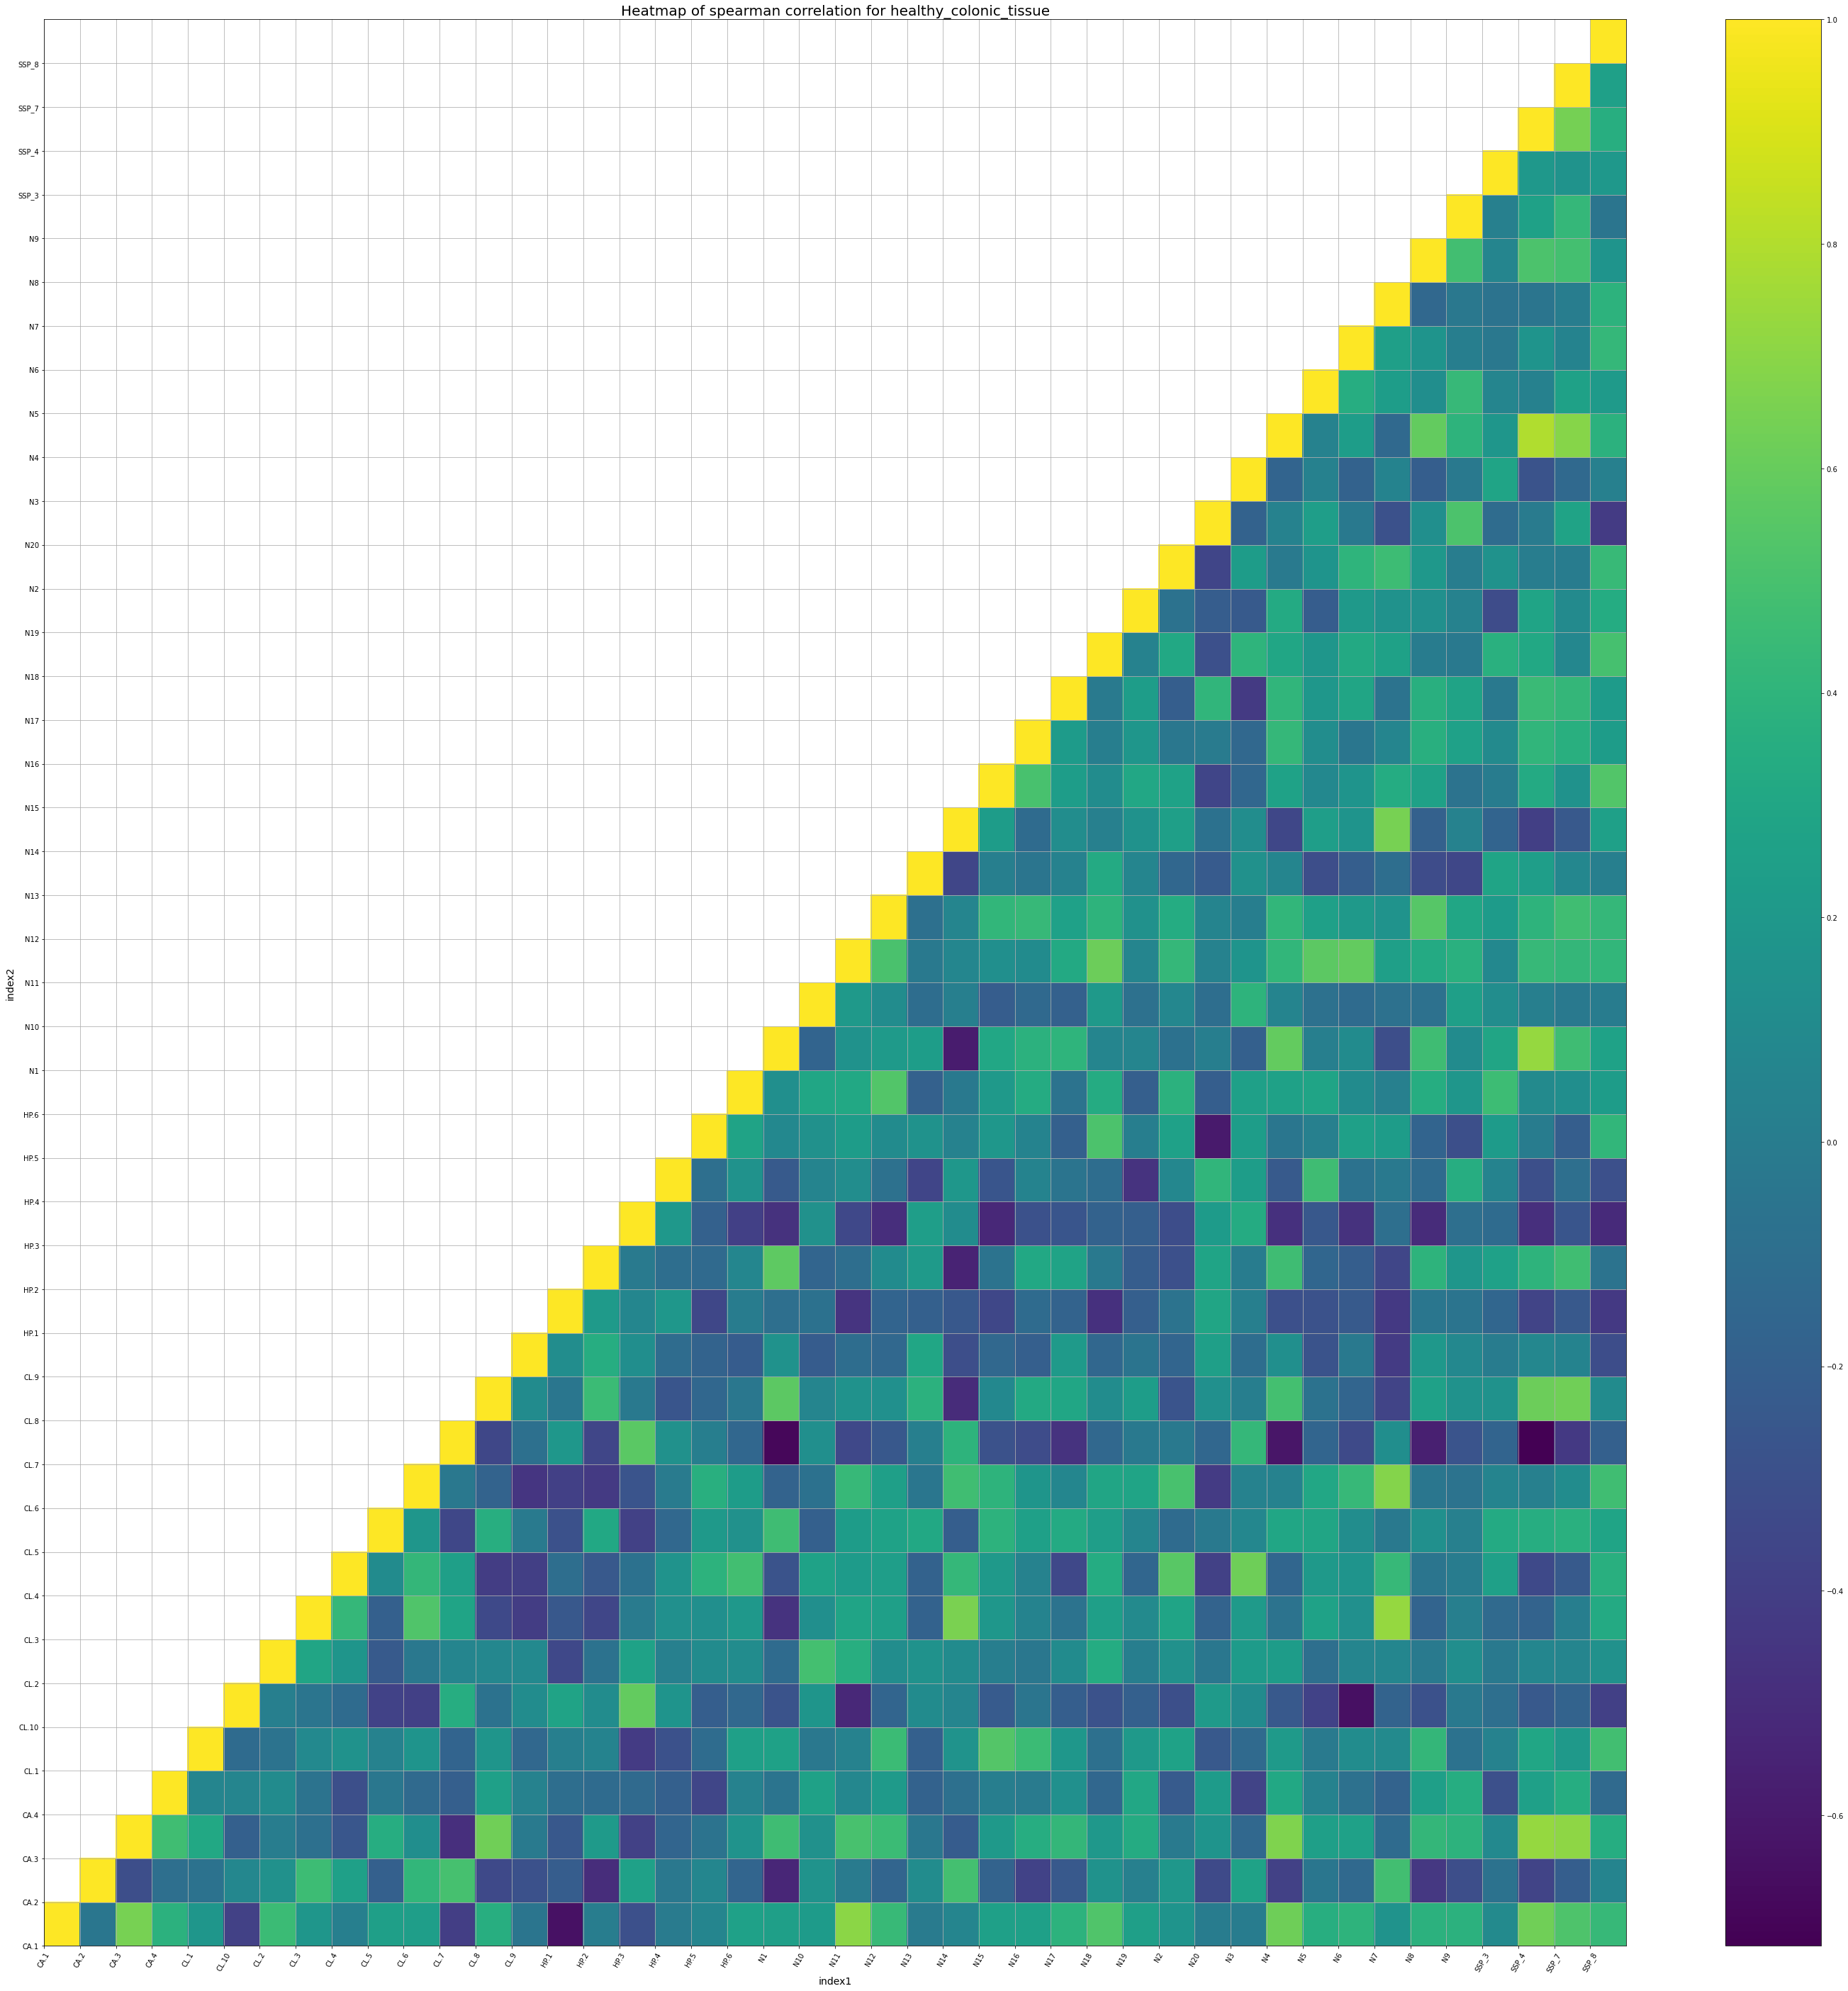

index2,CA.1,CA.2,CA.3,CA.4,CL.1,CL.10,CL.2,CL.3,CL.4,CL.5,...,N4,N5,N6,N7,N8,N9,SSP_3,SSP_4,SSP_7,SSP_8
index1,,,,,,,,,,,,,,,,,,,,,
CA.1,1.0,-0.044257,0.649753,0.376885,0.186047,-0.383369,0.452290,0.184073,0.017900,0.246371,...,0.624383,0.360677,0.393235,0.166314,0.381536,0.382241,0.101057,0.625088,0.522763,0.430726
CA.2,NaN,1.000000,-0.312474,-0.095842,-0.070895,0.076251,0.145595,0.460747,0.254545,-0.194644,...,-0.383228,-0.041156,-0.133615,0.481043,-0.437491,-0.310923,-0.067794,-0.368851,-0.208316,0.059197
CA.3,NaN,NaN,1.000000,0.474419,0.313319,-0.196617,0.007470,-0.090627,-0.256519,0.351797,...,0.671177,0.246794,0.261452,-0.123185,0.421564,0.388020,0.094715,0.729105,0.709091,0.345736
CA.4,NaN,NaN,NaN,1.000000,0.061452,0.067230,0.107259,-0.062297,-0.305144,-0.035518,...,0.313037,0.042565,-0.079493,-0.178717,0.249049,0.344186,-0.298661,0.254968,0.343481,-0.130092
CL.1,NaN,NaN,NaN,NaN,1.000000,-0.120930,-0.061170,0.094574,0.154475,0.036646,...,0.212826,-0.015363,0.112615,0.098661,0.416913,-0.068781,0.043411,0.296970,0.203383,0.480056
CL.10,NaN,NaN,NaN,NaN,NaN,1.000000,0.015786,-0.048626,-0.120930,-0.375194,...,-0.246512,-0.377167,-0.646230,-0.178013,-0.287385,-0.021987,-0.096970,-0.245666,-0.177167,-0.390416
CL.2,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.292600,0.179140,-0.237632,...,0.224947,-0.093446,0.065539,0.072868,-0.017336,0.122481,-0.024947,0.068499,0.061734,0.145736
CL.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.424947,-0.194080,...,-0.065257,0.272445,0.140944,0.728682,-0.170120,0.015645,-0.128682,-0.176603,0.010007,0.326568
CL.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.103876,...,-0.157153,0.208739,0.170402,0.434954,-0.051727,0.000141,0.254545,-0.337280,-0.240310,0.363354


In [187]:
heatmap_spearman(df_spearman_NS, "healthy_colonic_tissue")

In [49]:
# spearman 상관계수 구하기 

df_corr_spearman_TubA = data_TubA.corr(method='spearman')
df_corr_spearman_TubA.to_csv("corr_spearman_Tubulovillous_adenoma.csv") # csv 파일로 correlation 값 저장 
df_corr_spearman_TubA

,AD2,AD3,AD4,AD5,AD7,AD8,AD9,AD19,AD20,GSM3304958,...,GSM3305074,GSM3305075,GSM3305077,GSM3305079,GSM3305080,GSM3305081,GSM3305082,GSM3305087,GSM3305090,GSM3305091
AD2,1.000000,0.953314,0.940044,0.951924,0.923859,0.895645,0.926336,0.931839,0.944363,0.855121,...,0.921891,0.939111,0.929179,0.912823,0.930568,0.913946,0.848528,0.941935,0.894436,0.914981
AD3,0.953314,1.000000,0.952399,0.947581,0.950039,0.926574,0.939679,0.943239,0.961872,0.859805,...,0.924392,0.947891,0.925507,0.919662,0.931484,0.922429,0.867835,0.937641,0.884685,0.927076
AD4,0.940044,0.952399,1.000000,0.954935,0.962183,0.941910,0.942256,0.937148,0.949615,0.883252,...,0.950244,0.950758,0.948324,0.941004,0.939751,0.936067,0.911081,0.946040,0.880498,0.942570
AD5,0.951924,0.947581,0.954935,1.000000,0.944644,0.923702,0.941163,0.938572,0.935196,0.856768,...,0.927292,0.943189,0.938076,0.921658,0.929165,0.919419,0.877176,0.941926,0.890716,0.919588
AD7,0.923859,0.950039,0.962183,0.944644,1.000000,0.958912,0.952902,0.943104,0.940922,0.889631,...,0.943613,0.948383,0.931545,0.944004,0.953770,0.943071,0.918455,0.937899,0.866468,0.944961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3305081,0.913946,0.922429,0.936067,0.919419,0.943071,0.920784,0.933420,0.930319,0.921643,0.865557,...,0.938989,0.923169,0.915248,0.930673,0.936692,1.000000,0.897967,0.923277,0.858566,0.916012
GSM3305082,0.848528,0.867835,0.911081,0.877176,0.918455,0.914394,0.887728,0.864595,0.867747,0.893639,...,0.907761,0.885177,0.869523,0.913450,0.894766,0.897967,1.000000,0.888651,0.749800,0.929056
GSM3305087,0.941935,0.937641,0.946040,0.941926,0.937899,0.929485,0.921959,0.916221,0.929474,0.890993,...,0.929511,0.930862,0.925346,0.931734,0.922528,0.923277,0.888651,1.000000,0.853007,0.937876
GSM3305090,0.894436,0.884685,0.880498,0.890716,0.866468,0.824517,0.877545,0.897682,0.877903,0.743671,...,0.874024,0.885339,0.897874,0.834747,0.870374,0.858566,0.749800,0.853007,1.000000,0.800262


In [50]:
data_TubA.head()

,AD2,AD3,AD4,AD5,AD7,AD8,AD9,AD19,AD20,GSM3304958,...,GSM3305074,GSM3305075,GSM3305077,GSM3305079,GSM3305080,GSM3305081,GSM3305082,GSM3305087,GSM3305090,GSM3305091
1,2.789946,3.195222,3.319606,2.838453,3.265925,3.596947,3.121689,3.218949,2.818253,4.351830,...,3.000881,3.717324,3.009351,3.474577,3.446568,3.365966,4.291483,3.132092,2.649586,3.478557
10,7.556637,6.093760,5.424670,5.430752,5.461447,5.457786,4.653694,4.809906,6.103651,3.838480,...,4.103420,4.402792,5.974928,4.737231,5.717568,4.497752,3.629250,5.903637,4.797309,5.409320
100,2.948939,3.092565,3.540404,3.808745,3.609537,4.031993,3.714014,3.546008,3.427859,3.560501,...,3.770198,3.456412,3.716821,2.921334,3.792060,4.023543,4.355084,3.568144,3.837970,3.328277
10000,3.361507,2.923467,3.284888,3.413820,2.555870,2.742847,2.775615,2.711198,3.016601,3.411541,...,2.908773,3.665185,3.779909,3.505241,2.939688,2.811697,2.485828,3.039285,3.452449,3.057759
100009676,3.144878,3.422996,3.331657,3.416363,3.186508,3.315782,3.254141,3.087181,3.556464,3.197388,...,3.198071,3.353692,3.571009,3.695452,3.073788,3.641678,3.323565,3.414094,3.117853,3.426711


In [51]:
print(df_corr_spearman_TubA[df_corr_spearman_TubA<0].count())
df_corr_spearman_TubA[df_corr_spearman_TubA<0].count().sum()

AD2           0
AD3           0
AD4           0
AD5           0
AD7           0
             ..
GSM3305081    0
GSM3305082    0
GSM3305087    0
GSM3305090    0
GSM3305091    0
Length: 103, dtype: int64


0

In [147]:
df_spearman_TubA = spear_df(sort_df(data_TubA))
df_spearman_TubA.to_csv("corr_spearman_pval_Tubulovillous_adenoma.csv")
df_spearman_TubA.head()

,spearman,pvalue,index1,index2
0,1.000000,0.000000,AD19,AD19
1,-0.332300,0.000605,AD19,AD2
2,-0.103480,0.298255,AD19,AD20
3,-0.147861,0.136088,AD19,AD3
4,-0.066468,0.504722,AD19,AD4


In [53]:
df_spearman_TubA[df_spearman_TubA['spearman']>0]

,spearman,pvalue,index1,index2
0,1.000000,0.000000,AD2,AD2
6,0.351712,0.000269,AD2,AD9
7,0.342135,0.000404,AD2,AD19
8,0.230852,0.018972,AD2,AD20
10,0.058159,0.559528,AD2,GSM3304961
...,...,...,...,...
5348,0.348471,0.000310,GSM3305082,GSM3305090
5350,1.000000,0.000000,GSM3305087,GSM3305087
5351,0.126664,0.202326,GSM3305087,GSM3305090
5353,1.000000,0.000000,GSM3305090,GSM3305090


In [54]:
remove_noise(data_TubA, df_spearman_TubA)

df_spearman 크기:  (5356, 4)
df_noise 크기:  (4426, 4)
df_noise에 해당되는 샘플: {'GSM3305056', 'GSM3305046', 'GSM3304982', 'AD4', 'GSM3304967', 'GSM3305002', 'GSM3304962', 'GSM3305001', 'GSM3305044', 'GSM3305015', 'GSM3304961', 'GSM3304980', 'GSM3304971', 'GSM3305059', 'GSM3305011', 'GSM3304995', 'GSM3305031', 'GSM3305043', 'GSM3305081', 'GSM3304966', 'GSM3305024', 'GSM3305017', 'GSM3305090', 'GSM3304974', 'GSM3304958', 'GSM3305037', 'GSM3305022', 'GSM3304977', 'GSM3305071', 'GSM3305049', 'GSM3305047', 'GSM3304963', 'GSM3304983', 'GSM3305027', 'GSM3304970', 'GSM3305032', 'GSM3305075', 'GSM3305036', 'GSM3305029', 'AD5', 'GSM3305066', 'GSM3304999', 'GSM3305073', 'GSM3305087', 'GSM3305091', 'GSM3305033', 'GSM3305082', 'GSM3304986', 'GSM3304991', 'GSM3305070', 'GSM3305055', 'GSM3305067', 'GSM3305000', 'GSM3305074', 'GSM3305035', 'GSM3304992', 'GSM3305072', 'GSM3304989', 'AD7', 'AD3', 'GSM3305077', 'AD20', 'AD9', 'GSM3305042', 'GSM3305026', 'GSM3305014', 'GSM3305065', 'GSM3305079', 'GSM3304997', 'GSM

[]

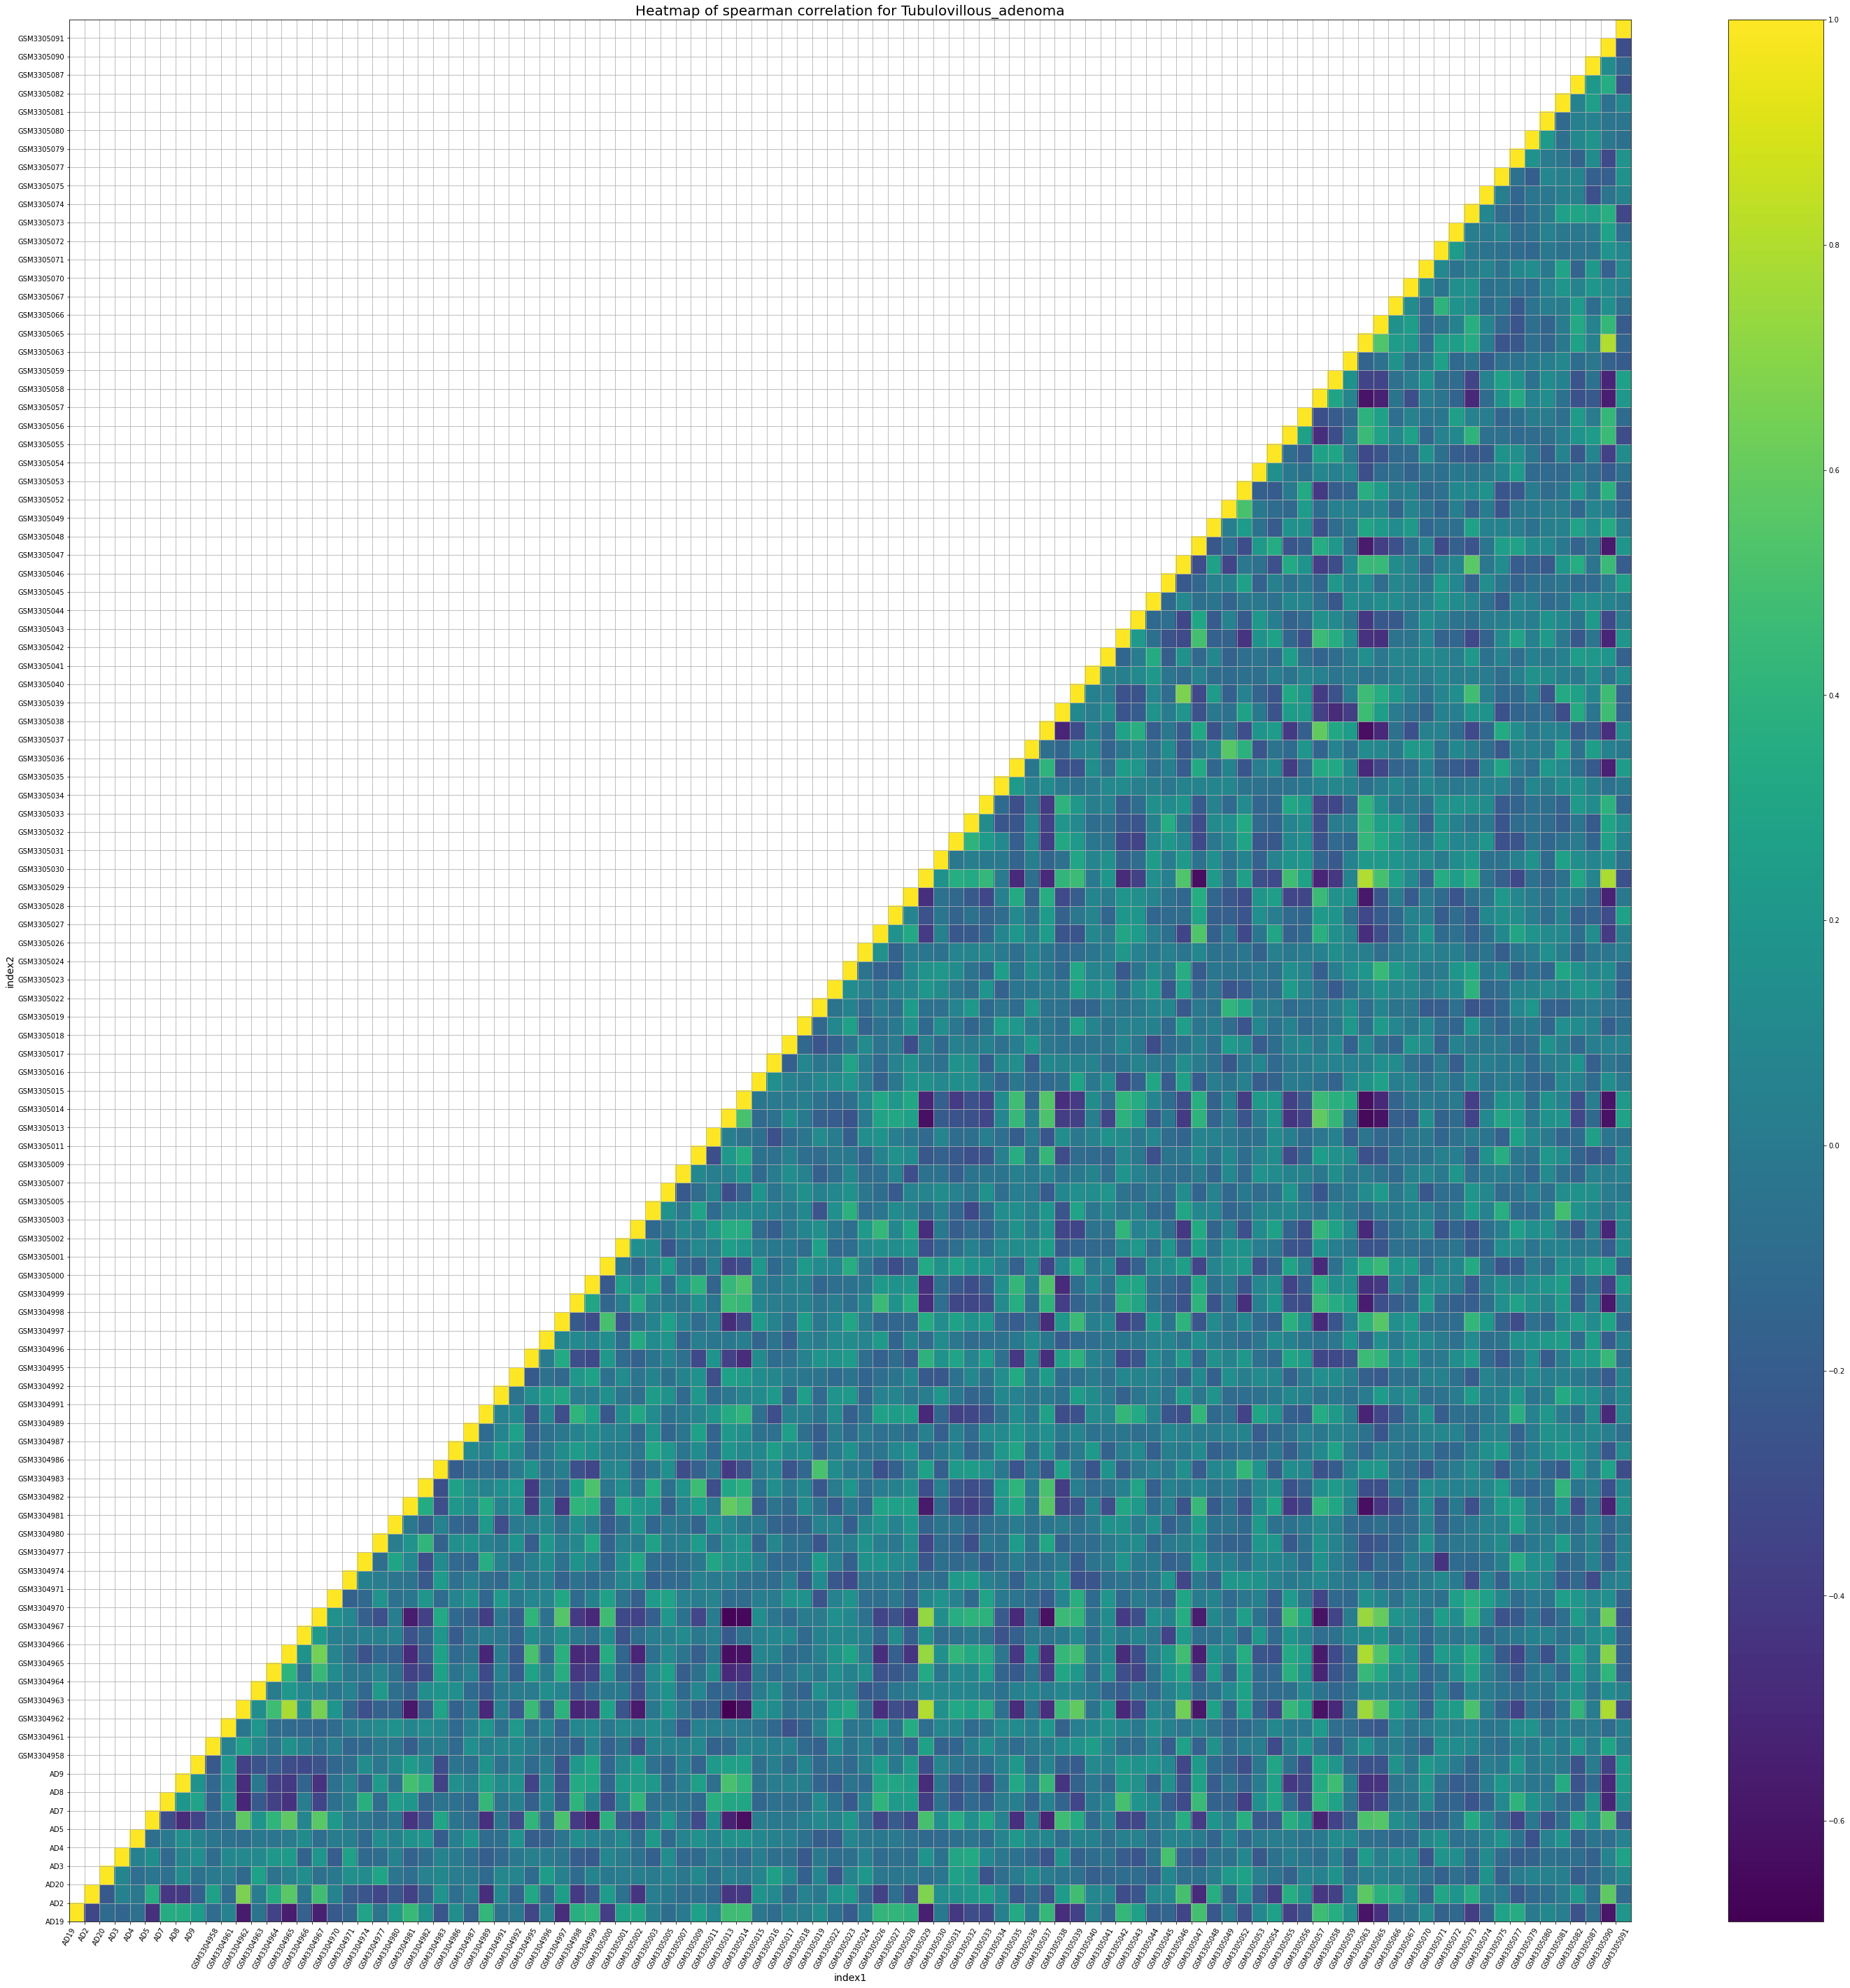

index2,AD19,AD2,AD20,AD3,AD4,AD5,AD7,AD8,AD9,GSM3304958,...,GSM3305074,GSM3305075,GSM3305077,GSM3305079,GSM3305080,GSM3305081,GSM3305082,GSM3305087,GSM3305090,GSM3305091
index1,,,,,,,,,,,,,,,,,,,,,
AD19,1.0,-0.3323,-0.10348,-0.147861,-0.066468,-0.458179,0.351712,0.342135,0.230852,-0.099789,...,-0.158015,0.282625,0.349702,-0.001538,0.101997,0.022333,-0.267007,-0.080042,-0.592905,0.193527
AD2,NaN,1.0000,-0.22597,0.043975,-0.016331,0.353622,-0.424724,-0.399881,-0.178667,0.268802,...,0.026194,-0.000615,-0.223695,-0.118257,-0.083255,0.010324,0.203894,-0.089839,0.582118,-0.098921
AD20,NaN,NaN,1.00000,0.078186,-0.088510,-0.023756,-0.063777,0.114264,-0.061207,-0.000516,...,0.171561,-0.165631,0.013234,0.052036,0.043256,0.026545,-0.191813,-0.117592,-0.026490,0.090827
AD3,NaN,NaN,NaN,1.000000,0.048423,0.139118,-0.113331,0.074748,0.145774,-0.101480,...,0.113133,-0.095890,-0.193667,-0.158888,-0.054650,-0.073464,-0.083436,-0.156295,0.058758,0.287067
AD4,NaN,NaN,NaN,NaN,1.000000,-0.078538,0.000308,0.148541,0.068357,-0.025008,...,0.051432,0.181896,-0.037995,-0.270692,0.059999,0.186048,-0.155625,-0.039494,-0.086324,0.058725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3305081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.055639,0.249363,-0.058483,0.101393
GSM3305082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.203093,0.348471,-0.272712
GSM3305087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.126664,-0.115308


In [188]:
heatmap_spearman(df_spearman_TubA, 'Tubulovillous_adenoma')

In [55]:
# spearman 상관계수 구하기 

df_corr_spearman_SSP = data_SSP.corr(method='spearman')
df_corr_spearman_SSP.to_csv("corr_spearman_sessile_serrated_adenoma.csv") # csv 파일로 correlation 값 저장 
df_corr_spearman_SSP

,Ca_2,Ca_1,TSA_2,FAP_2,GSM3304973,GSM3304975,GSM3304984,GSM3304993,SSA.P.1,SSA.P.2,...,SSA.P.12,SSA.P.13,SSA.P.14,SSA.P.15,SSA.P.16,SSA.P.17,SSA.P.18,SSA.P.19,SSA.P.20,SSA.P.21
Ca_2,1.000000,0.880581,0.802492,0.825194,0.747178,0.710122,0.787365,0.836009,0.791650,0.827296,...,0.791489,0.816864,0.802008,0.829742,0.799446,0.781995,0.849421,0.825611,0.769403,0.794375
Ca_1,0.880581,1.000000,0.871392,0.887173,0.818784,0.786759,0.848360,0.898855,0.862173,0.902490,...,0.858731,0.884941,0.881394,0.896994,0.881739,0.869937,0.892361,0.888756,0.786345,0.853750
TSA_2,0.802492,0.871392,1.000000,0.962791,0.910490,0.915991,0.926407,0.931397,0.948056,0.956609,...,0.943838,0.938611,0.919641,0.959453,0.940211,0.915182,0.927845,0.948603,0.857024,0.933932
FAP_2,0.825194,0.887173,0.962791,1.000000,0.896261,0.868489,0.910461,0.944100,0.909489,0.942536,...,0.911197,0.947892,0.921580,0.947254,0.906352,0.882949,0.951000,0.946565,0.869452,0.899880
GSM3304973,0.747178,0.818784,0.910490,0.896261,1.000000,0.935279,0.937614,0.907363,0.907159,0.920866,...,0.901798,0.929974,0.924654,0.927270,0.910860,0.896069,0.854393,0.907405,0.793762,0.903122
GSM3304975,0.710122,0.786759,0.915991,0.868489,0.935279,1.000000,0.913926,0.878366,0.923388,0.911978,...,0.910539,0.903897,0.894919,0.918167,0.919864,0.902269,0.829014,0.895786,0.770938,0.917317
GSM3304984,0.787365,0.848360,0.926407,0.910461,0.937614,0.913926,1.000000,0.906950,0.926227,0.941991,...,0.925874,0.919550,0.902359,0.950075,0.919356,0.892969,0.889077,0.940294,0.854358,0.924926
GSM3304993,0.836009,0.898855,0.931397,0.944100,0.907363,0.878366,0.906950,1.000000,0.914806,0.944736,...,0.898554,0.951628,0.947232,0.946677,0.922276,0.896612,0.936274,0.945910,0.840764,0.890722
SSA.P.1,0.791650,0.862173,0.948056,0.909489,0.907159,0.923388,0.926227,0.914806,1.000000,0.952362,...,0.948606,0.924189,0.900847,0.957769,0.966279,0.941106,0.886336,0.938289,0.808273,0.937947
SSA.P.2,0.827296,0.902490,0.956609,0.942536,0.920866,0.911978,0.941991,0.944736,0.952362,1.000000,...,0.941870,0.942990,0.932257,0.976723,0.953079,0.936576,0.934025,0.956363,0.864674,0.928790


In [56]:
df_corr_spearman_SSP[df_corr_spearman_SSP<0].count()

Ca_2          0
Ca_1          0
TSA_2         0
FAP_2         0
GSM3304973    0
GSM3304975    0
GSM3304984    0
GSM3304993    0
SSA.P.1       0
SSA.P.2       0
SSA.P.3       0
SSA.P.4       0
SSA.P.5       0
SSA.P.6       0
SSA.P.7       0
SSA.P.8       0
SSA.P.9       0
SSA.P.10      0
SSA.P.11      0
SSA.P.12      0
SSA.P.13      0
SSA.P.14      0
SSA.P.15      0
SSA.P.16      0
SSA.P.17      0
SSA.P.18      0
SSA.P.19      0
SSA.P.20      0
SSA.P.21      0
dtype: int64

In [148]:
df_spearman_SSP = spear_df(sort_df(data_SSP))
df_spearman_SSP.to_csv("corr_spearman_pval_sessile_serrated_adenoma.csv")
df_spearman_SSP.head()

,spearman,pvalue,index1,index2
0,1.000000,8.376948e-209,Ca_1,Ca_1
1,0.140887,4.660181e-01,Ca_1,Ca_2
2,0.042365,8.272714e-01,Ca_1,FAP_2
3,-0.141872,4.628738e-01,Ca_1,GSM3304973
4,-0.254187,1.833186e-01,Ca_1,GSM3304975


In [58]:
df_spearman_SSP[df_spearman_SSP['spearman']>0]

,spearman,pvalue,index1,index2
0,1.000000,8.376948e-209,Ca_2,Ca_2
1,0.140887,4.660181e-01,Ca_2,Ca_1
2,0.042365,8.272714e-01,Ca_2,TSA_2
6,0.083744,6.658160e-01,Ca_2,GSM3304984
7,0.258128,1.763881e-01,Ca_2,GSM3304993
...,...,...,...,...
426,0.290640,1.261320e-01,SSA.P.18,SSA.P.19
429,1.000000,8.376948e-209,SSA.P.19,SSA.P.19
432,1.000000,8.376948e-209,SSA.P.20,SSA.P.20
433,0.129064,5.046074e-01,SSA.P.20,SSA.P.21


In [59]:
remove_noise(data_SSP, df_spearman_SSP)

df_spearman 크기:  (435, 4)
df_noise 크기:  (353, 4)
df_noise에 해당되는 샘플: {'SSA.P.14', 'SSA.P.19', 'FAP_2', 'GSM3304993', 'SSA.P.17', 'SSA.P.13', 'SSA.P.2', 'GSM3304973', 'SSA.P.16', 'SSA.P.18', 'Ca_2', 'GSM3304975', 'SSA.P.15', 'SSA.P.6', 'SSA.P.7', 'GSM3304984', 'SSA.P.9', 'SSA.P.11', 'SSA.P.5', 'SSA.P.4', 'SSA.P.1', 'Ca_1', 'SSA.P.12', 'TSA_2', 'SSA.P.20', 'SSA.P.3', 'SSA.P.10', 'SSA.P.21', 'SSA.P.8'}
df_combined (original)인 전체 샘플: {'SSA.P.14', 'SSA.P.19', 'FAP_2', 'GSM3304993', 'SSA.P.17', 'SSA.P.13', 'SSA.P.2', 'GSM3304973', 'SSA.P.16', 'SSA.P.18', 'Ca_2', 'GSM3304975', 'SSA.P.15', 'SSA.P.6', 'SSA.P.7', 'GSM3304984', 'SSA.P.9', 'SSA.P.11', 'SSA.P.5', 'SSA.P.4', 'SSA.P.1', 'Ca_1', 'SSA.P.12', 'TSA_2', 'SSA.P.20', 'SSA.P.3', 'SSA.P.10', 'SSA.P.21', 'SSA.P.8'}


[]

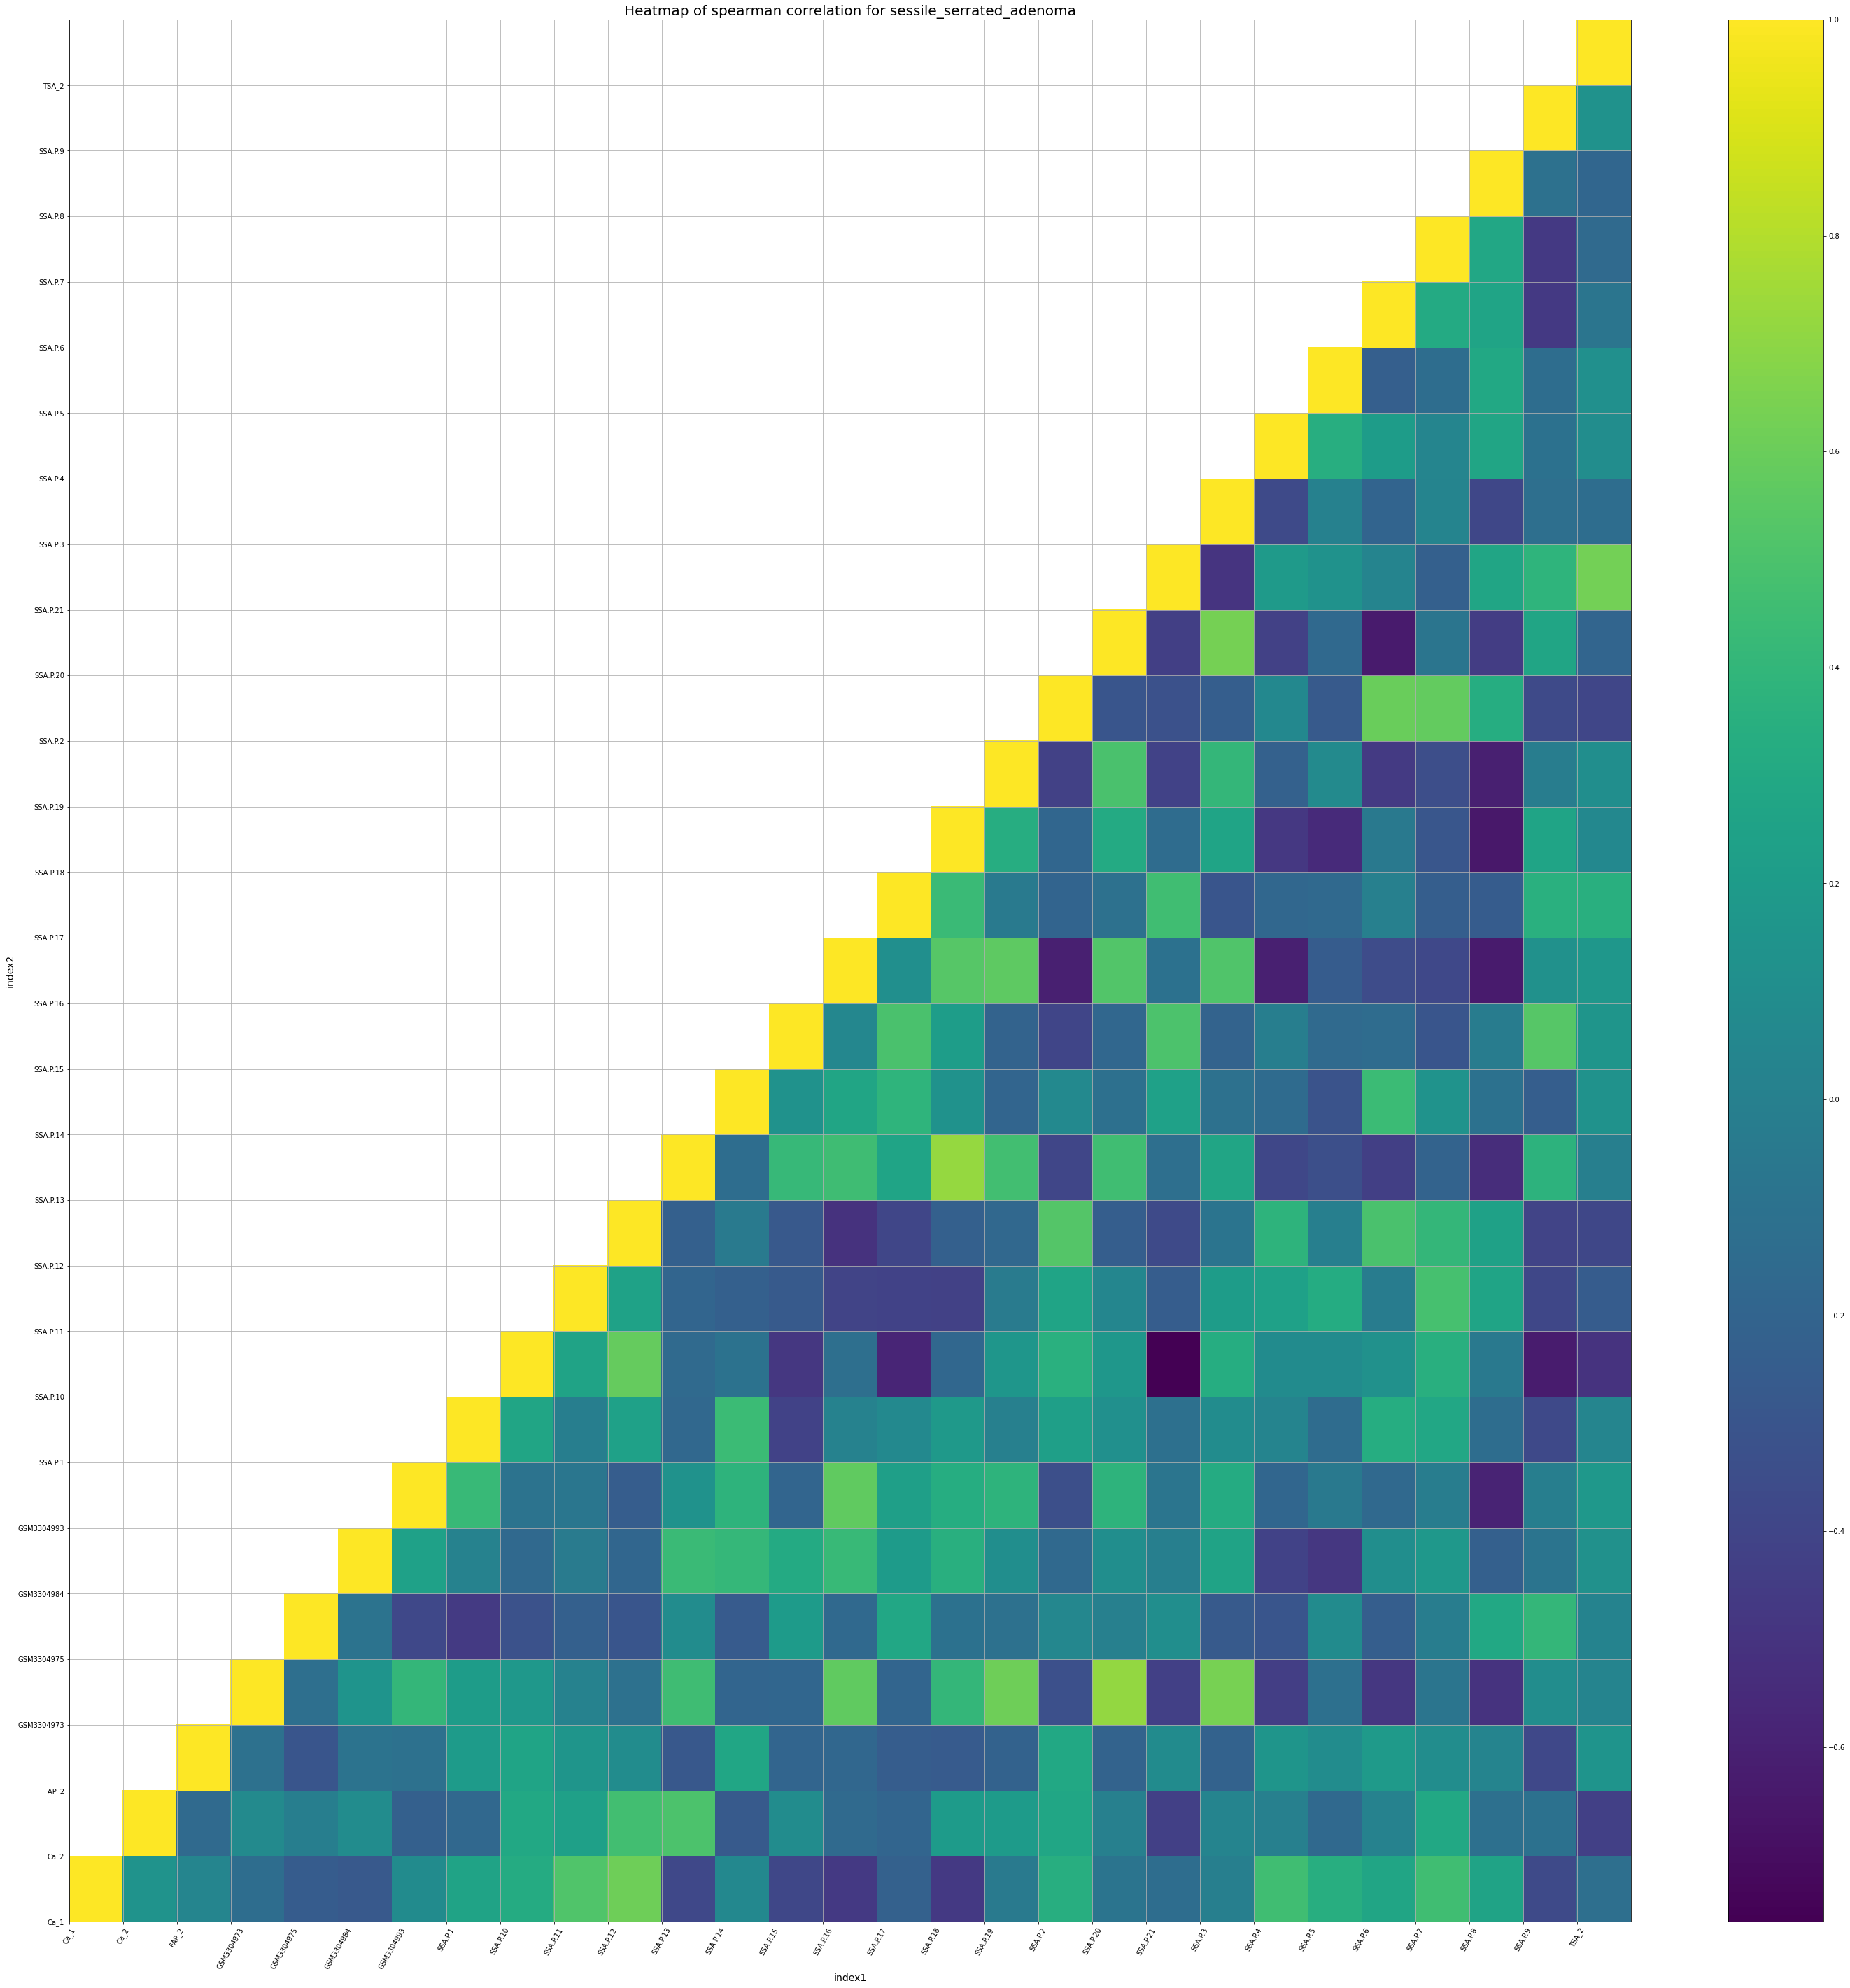

index2,Ca_1,Ca_2,FAP_2,GSM3304973,GSM3304975,GSM3304984,GSM3304993,SSA.P.1,SSA.P.10,SSA.P.11,...,SSA.P.20,SSA.P.21,SSA.P.3,SSA.P.4,SSA.P.5,SSA.P.6,SSA.P.7,SSA.P.8,SSA.P.9,TSA_2
index1,,,,,,,,,,,,,,,,,,,,,
Ca_1,1.0,0.140887,0.042365,-0.141872,-0.254187,-0.276847,0.083744,0.258128,0.318227,0.514778,...,-0.084729,-0.140394,-0.011330,0.456650,0.341872,0.271429,0.463054,0.262069,-0.368473,-0.126108
Ca_2,NaN,1.000000,-0.162562,0.077340,-0.015271,0.091626,-0.230049,-0.175369,0.297537,0.230049,...,-0.003941,-0.429064,0.033990,0.000985,-0.165025,0.011823,0.297044,-0.114778,-0.101478,-0.429557
FAP_2,NaN,NaN,1.000000,-0.111823,-0.300493,-0.090640,-0.113793,0.200493,0.264039,0.159606,...,-0.204926,0.081773,-0.213793,0.159113,0.090640,0.189655,0.095567,0.033005,-0.382266,0.150739
GSM3304973,NaN,NaN,NaN,1.000000,-0.122660,0.152709,0.403941,0.208374,0.176355,0.012808,...,0.715764,-0.425123,0.639409,-0.442857,-0.115764,-0.483251,-0.079803,-0.506404,0.098030,0.034483
GSM3304975,NaN,NaN,NaN,NaN,1.000000,-0.092611,-0.379803,-0.461576,-0.317241,-0.226108,...,0.001478,0.099015,-0.270443,-0.300000,0.084729,-0.239901,-0.024631,0.294581,0.403448,0.023645
GSM3304984,NaN,NaN,NaN,NaN,NaN,1.000000,0.240394,0.019212,-0.168473,-0.036946,...,0.099507,-0.010837,0.263054,-0.416256,-0.485714,0.103941,0.180788,-0.226601,-0.081773,0.121182
GSM3304993,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.427094,-0.093596,-0.068966,...,0.377340,-0.074384,0.318719,-0.190148,-0.048276,-0.166502,-0.023153,-0.593103,-0.012808,0.178818
SSA.P.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.271429,-0.012315,...,0.117241,-0.116749,0.091626,0.036453,-0.144335,0.332512,0.290640,-0.136946,-0.370443,0.040394
SSA.P.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.262069,...,0.168966,-0.761576,0.328079,0.079803,0.080296,0.120690,0.350246,-0.046798,-0.624138,-0.500493


In [189]:
heatmap_spearman(df_spearman_SSP, 'sessile_serrated_adenoma')

In [60]:
# spearman 상관계수 구하기 

df_corr_spearman_AP = data_AP.corr(method='spearman')
df_corr_spearman_AP.to_csv("corr_spearman_adenomatous_polyp.csv") # csv 파일로 correlation 값 저장 
df_corr_spearman_AP

,GSM3305006,GSM3305012,GSM3305060,GSM3305062,GSM3305069,GSM3305076,GSM3305083,GSM3305085,GSM3305086,HP.7,HP.8,HP.9,HP.10,AP.1,AP.2,AP.3,AP.4,AP.5,AP.6
GSM3305006,1.000000,0.922762,0.924742,0.939173,0.883918,0.935771,0.946535,0.860809,0.923430,0.917847,0.916891,0.902667,0.943290,0.938020,0.924920,0.934572,0.927381,0.867734,0.884480
GSM3305012,0.922762,1.000000,0.890250,0.932859,0.920311,0.931555,0.910187,0.863144,0.927649,0.928914,0.930975,0.914512,0.953489,0.935140,0.934569,0.919729,0.923018,0.874437,0.904785
GSM3305060,0.924742,0.890250,1.000000,0.930826,0.862275,0.913172,0.941138,0.838187,0.904206,0.902424,0.897336,0.865054,0.921771,0.925801,0.921337,0.931206,0.900383,0.788409,0.871707
GSM3305062,0.939173,0.932859,0.930826,1.000000,0.894209,0.944523,0.943192,0.833509,0.920404,0.934095,0.933890,0.910240,0.949523,0.944980,0.947617,0.948008,0.936243,0.874013,0.900293
GSM3305069,0.883918,0.920311,0.862275,0.894209,1.000000,0.908339,0.884841,0.866096,0.903530,0.904488,0.901259,0.890028,0.928335,0.903517,0.902244,0.878365,0.887396,0.817632,0.898199
GSM3305076,0.935771,0.931555,0.913172,0.944523,0.908339,1.000000,0.936697,0.829548,0.921732,0.929684,0.923867,0.917576,0.953071,0.947294,0.941967,0.939497,0.945950,0.885673,0.917176
GSM3305083,0.946535,0.910187,0.941138,0.943192,0.884841,0.936697,1.000000,0.855926,0.928645,0.904683,0.906489,0.879579,0.935096,0.947136,0.937320,0.947750,0.932032,0.863212,0.894053
GSM3305085,0.860809,0.863144,0.838187,0.833509,0.866096,0.829548,0.855926,1.000000,0.864771,0.826140,0.837814,0.826320,0.865615,0.850450,0.825919,0.815705,0.832263,0.744425,0.844871
GSM3305086,0.923430,0.927649,0.904206,0.920404,0.903530,0.921732,0.928645,0.864771,1.000000,0.898341,0.895952,0.875883,0.935407,0.948195,0.923064,0.930405,0.924038,0.862090,0.891138
HP.7,0.917847,0.928914,0.902424,0.934095,0.904488,0.929684,0.904683,0.826140,0.898341,1.000000,0.977768,0.951106,0.948697,0.908103,0.932245,0.899476,0.897088,0.831614,0.887165


In [61]:
df_corr_spearman_AP[df_corr_spearman_AP<0].count()

GSM3305006    0
GSM3305012    0
GSM3305060    0
GSM3305062    0
GSM3305069    0
GSM3305076    0
GSM3305083    0
GSM3305085    0
GSM3305086    0
HP.7          0
HP.8          0
HP.9          0
HP.10         0
AP.1          0
AP.2          0
AP.3          0
AP.4          0
AP.5          0
AP.6          0
dtype: int64

In [149]:
df_spearman_AP = spear_df(sort_df(data_AP))
df_spearman_AP.to_csv("corr_spearman_pval_adenomatous_polyp.csv")
df_spearman_AP.head()

,spearman,pvalue,index1,index2
0,1.000000,0.000000,AP.1,AP.1
1,-0.052632,0.830556,AP.1,AP.2
2,0.180702,0.459109,AP.1,AP.3
3,-0.161404,0.509171,AP.1,AP.4
4,0.129825,0.596303,AP.1,AP.5


In [63]:
df_spearman_AP[df_spearman_AP['spearman']>0]

,spearman,pvalue,index1,index2
0,1.000000,0.000000,GSM3305006,GSM3305006
2,0.180702,0.459109,GSM3305006,GSM3305060
4,0.129825,0.596303,GSM3305006,GSM3305069
6,0.040351,0.869723,GSM3305006,GSM3305083
7,0.042105,0.864108,GSM3305006,GSM3305085
...,...,...,...,...
183,0.182456,0.454686,AP.3,AP.6
184,1.000000,0.000000,AP.4,AP.4
186,0.294737,0.220595,AP.4,AP.6
187,1.000000,0.000000,AP.5,AP.5


In [64]:
remove_noise(data_AP, df_spearman_AP)

df_spearman 크기:  (190, 4)
df_noise 크기:  (161, 4)
df_noise에 해당되는 샘플: {'AP.6', 'AP.4', 'GSM3305060', 'HP.7', 'HP.8', 'GSM3305085', 'HP.10', 'HP.9', 'AP.3', 'AP.1', 'GSM3305012', 'GSM3305062', 'GSM3305006', 'AP.5', 'GSM3305083', 'GSM3305076', 'GSM3305086', 'AP.2', 'GSM3305069'}
df_combined (original)인 전체 샘플: {'AP.6', 'AP.4', 'GSM3305060', 'HP.7', 'HP.8', 'GSM3305085', 'HP.10', 'HP.9', 'AP.3', 'AP.1', 'GSM3305012', 'GSM3305062', 'GSM3305006', 'AP.5', 'GSM3305083', 'GSM3305076', 'GSM3305086', 'AP.2', 'GSM3305069'}


[]

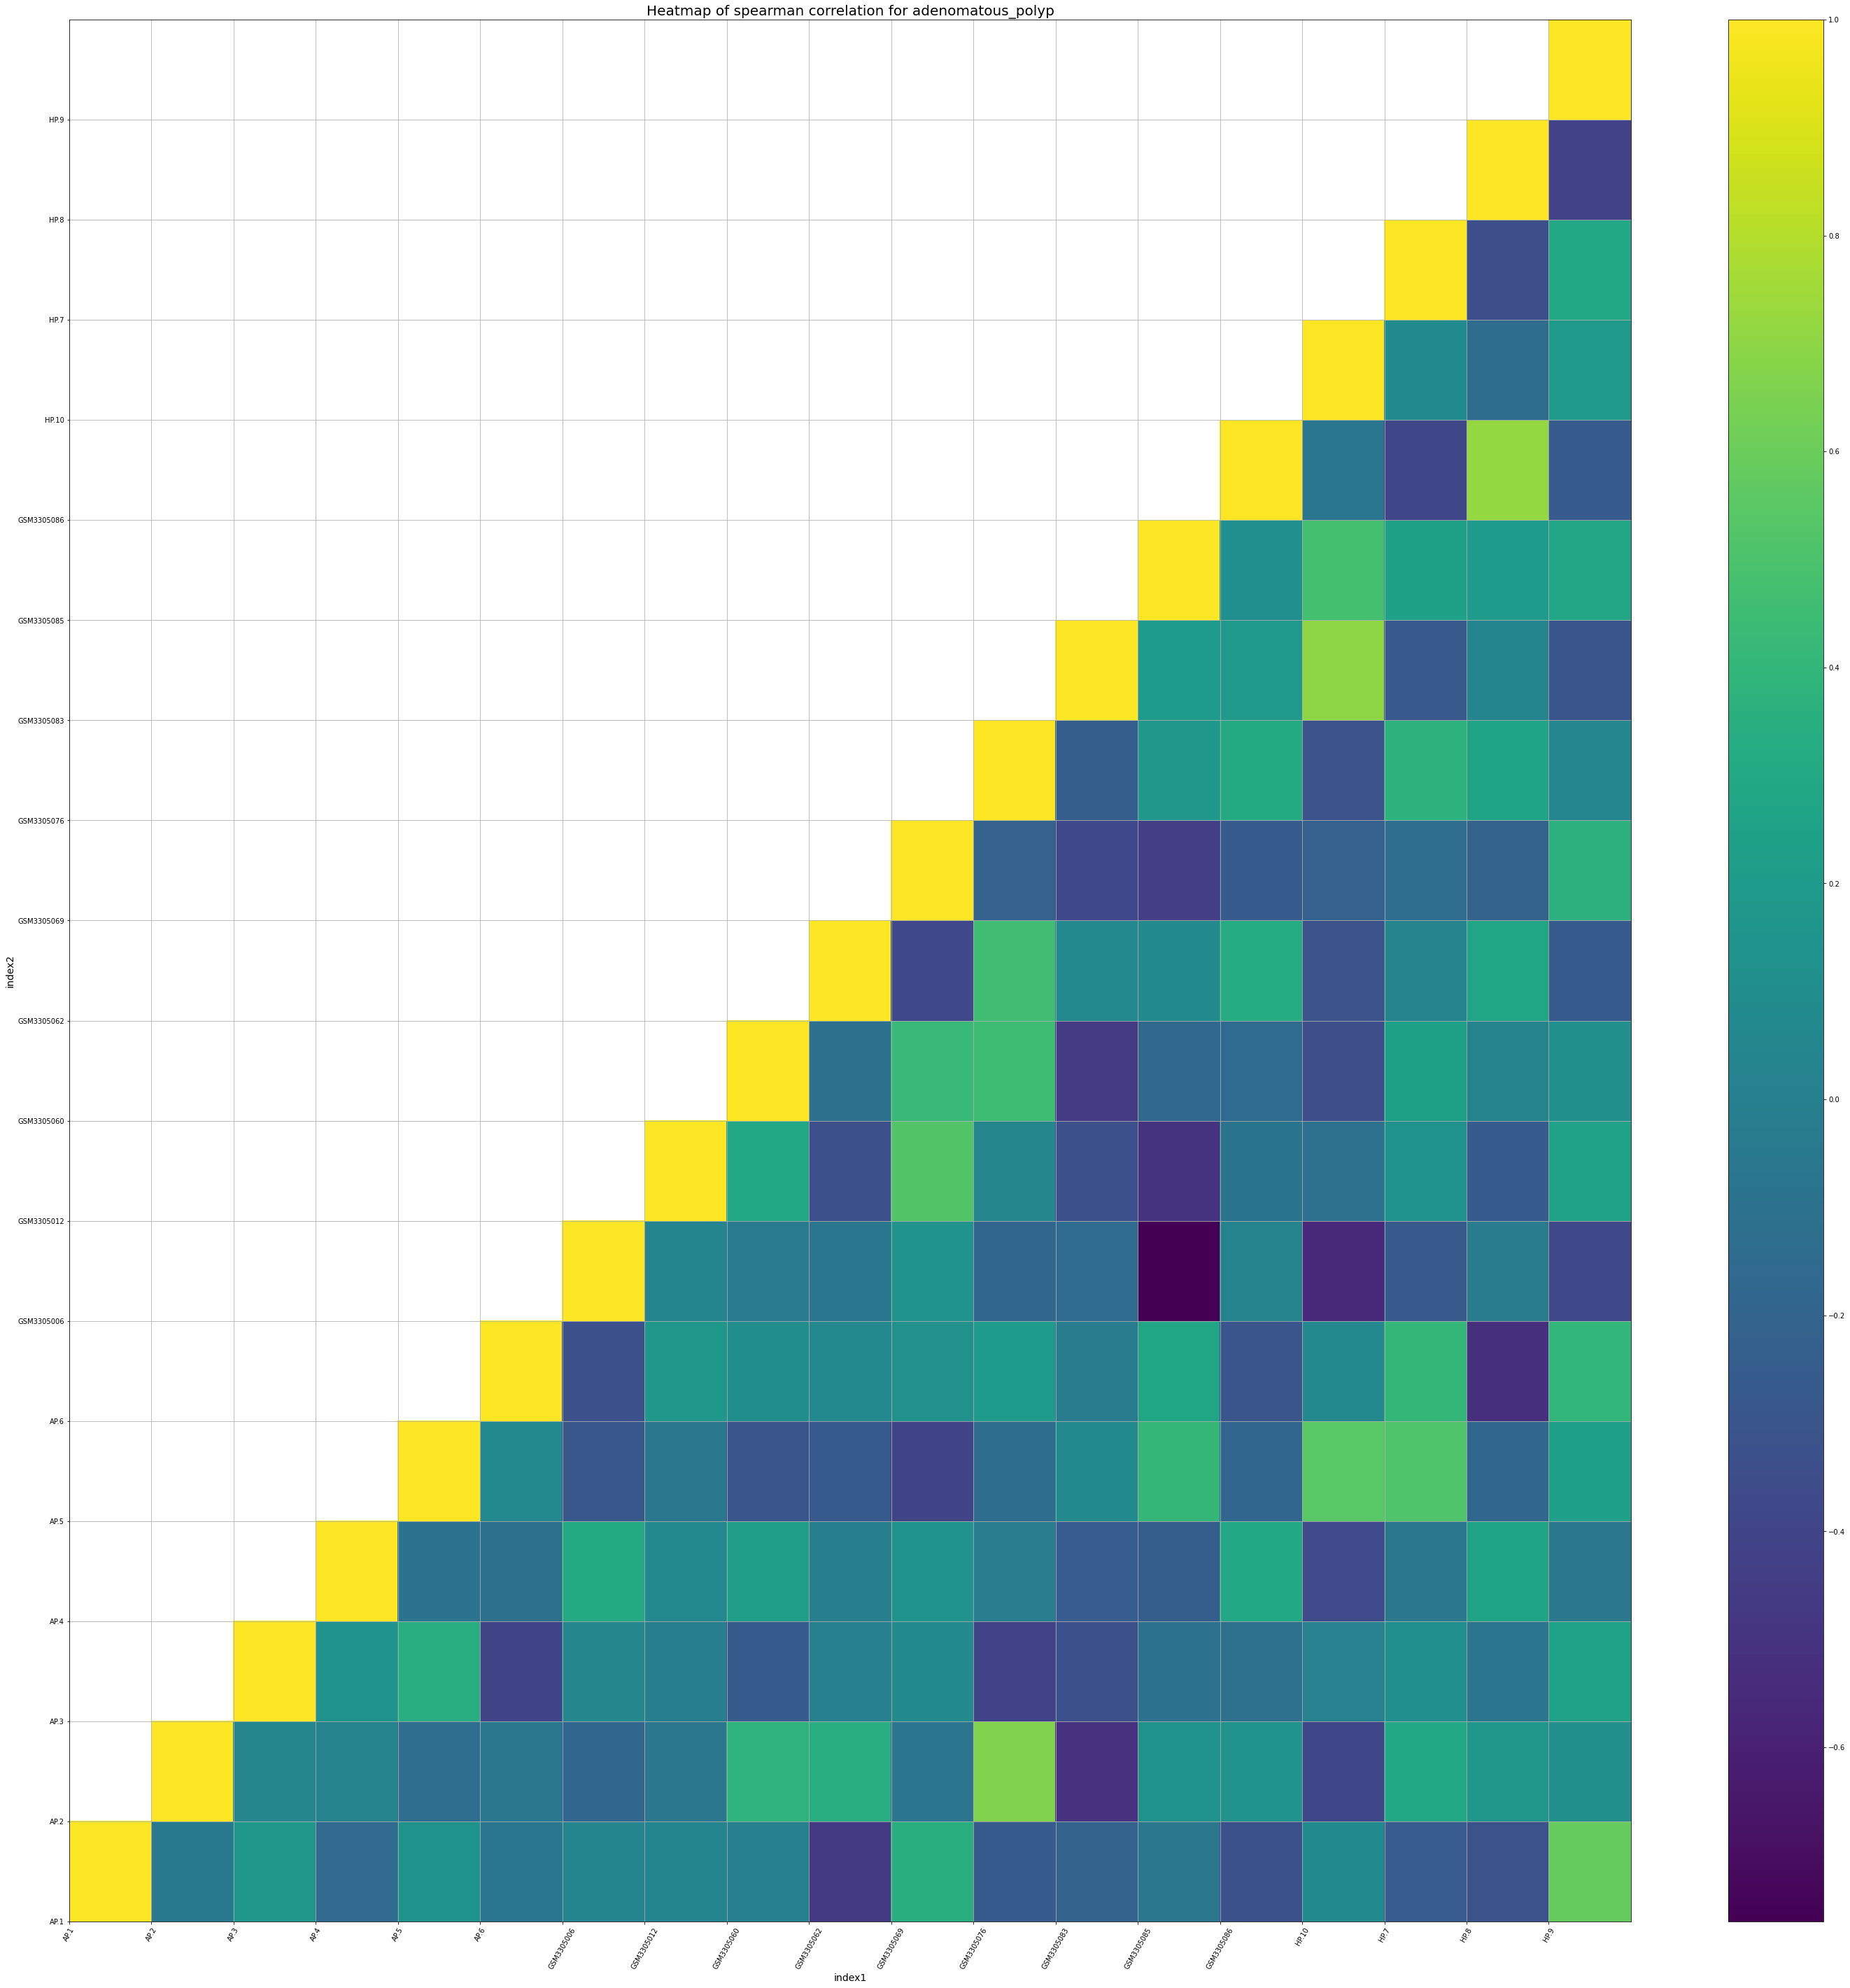

index2,AP.1,AP.2,AP.3,AP.4,AP.5,AP.6,GSM3305006,GSM3305012,GSM3305060,GSM3305062,GSM3305069,GSM3305076,GSM3305083,GSM3305085,GSM3305086,HP.10,HP.7,HP.8,HP.9
index1,,,,,,,,,,,,,,,,,,,
AP.1,1.0,-0.052632,0.180702,-0.161404,0.129825,-0.071930,0.040351,0.042105,0.005263,-0.461404,0.350877,-0.263158,-0.205263,-0.061404,-0.326316,0.082456,-0.247368,-0.317544,0.580702
AP.2,NaN,1.000000,0.050877,0.026316,-0.129825,-0.054386,-0.180702,-0.064912,0.375439,0.343860,-0.075439,0.664912,-0.507018,0.126316,0.140351,-0.389474,0.292982,0.177193,0.114035
AP.3,NaN,NaN,1.000000,0.142105,0.342105,-0.408772,0.050877,-0.005263,-0.259649,0.000000,0.073684,-0.412281,-0.329825,-0.103509,-0.108772,0.022807,0.112281,-0.077193,0.252632
AP.4,NaN,NaN,NaN,1.000000,-0.092982,-0.117544,0.305263,0.068421,0.222807,-0.010526,0.142105,-0.022807,-0.247368,-0.242105,0.296491,-0.368421,-0.061404,0.266667,-0.063158
AP.5,NaN,NaN,NaN,NaN,1.000000,0.064912,-0.282456,-0.057895,-0.296491,-0.271930,-0.407018,-0.142105,0.075439,0.405263,-0.180702,0.542105,0.515789,-0.177193,0.233333
AP.6,NaN,NaN,NaN,NaN,NaN,1.000000,-0.328070,0.168421,0.092982,0.066667,0.122807,0.198246,-0.028070,0.282456,-0.298246,0.066667,0.401754,-0.517544,0.396491
GSM3305006,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.036842,-0.040351,-0.066667,0.145614,-0.177193,-0.154386,-0.761404,0.029825,-0.563158,-0.278947,-0.026316,-0.378947
GSM3305012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.292982,-0.333333,0.524561,0.054386,-0.328070,-0.505263,-0.085965,-0.112281,0.133333,-0.257895,0.256140
GSM3305060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.119298,0.428070,0.456140,-0.456140,-0.173684,-0.154386,-0.342105,0.236842,0.029825,0.115789


In [190]:
heatmap_spearman(df_spearman_AP, 'adenomatous_polyp')

In [65]:
# spearman 상관계수 구하기 

df_corr_spearman_Cancer = data_Cancer.corr(method='spearman')
df_corr_spearman_Cancer.to_csv("corr_spearman_Cancer.csv") # csv 파일로 correlation 값 저장 
df_corr_spearman_Cancer

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T17,T18,T19,T20,NS_2,NS_1,AP.7,AP.8,AP.9,AP.10
T1,1.000000,0.915340,0.950727,0.897380,0.923371,0.898580,0.962172,0.875114,0.904107,0.878246,...,0.888838,0.911401,0.847561,0.877447,0.952385,0.939853,0.924435,0.934582,0.933845,0.956868
T2,0.915340,1.000000,0.934351,0.919003,0.929682,0.918712,0.888763,0.910483,0.905579,0.902766,...,0.925027,0.938955,0.884149,0.929118,0.900639,0.907062,0.890470,0.911847,0.914061,0.922638
T3,0.950727,0.934351,1.000000,0.925955,0.934650,0.936157,0.932751,0.908555,0.920204,0.917724,...,0.928137,0.941489,0.897383,0.916693,0.934855,0.937006,0.919786,0.933059,0.936485,0.945194
T4,0.897380,0.919003,0.925955,1.000000,0.889502,0.937628,0.856688,0.919683,0.915182,0.929824,...,0.921150,0.915707,0.886178,0.919390,0.872919,0.867483,0.871194,0.875968,0.883314,0.886412
T5,0.923371,0.929682,0.934650,0.889502,1.000000,0.904552,0.899493,0.902034,0.895230,0.911169,...,0.923523,0.951014,0.894910,0.907637,0.917805,0.922162,0.906684,0.933572,0.934005,0.931515
T6,0.898580,0.918712,0.936157,0.937628,0.904552,1.000000,0.862842,0.922377,0.914558,0.927037,...,0.934971,0.924636,0.901105,0.917387,0.872995,0.870108,0.876343,0.882796,0.895614,0.899260
T7,0.962172,0.888763,0.932751,0.856688,0.899493,0.862842,1.000000,0.831207,0.882176,0.841149,...,0.859200,0.871388,0.821039,0.836966,0.953742,0.944380,0.915057,0.923815,0.924380,0.946303
T8,0.875114,0.910483,0.908555,0.919683,0.902034,0.922377,0.831207,1.000000,0.899779,0.923691,...,0.914968,0.922356,0.888730,0.919613,0.851003,0.853099,0.870292,0.861425,0.884242,0.870404
T9,0.904107,0.905579,0.920204,0.915182,0.895230,0.914558,0.882176,0.899779,1.000000,0.904834,...,0.902911,0.908456,0.893487,0.889663,0.868914,0.873748,0.864580,0.880981,0.877002,0.899500
T10,0.878246,0.902766,0.917724,0.929824,0.911169,0.927037,0.841149,0.923691,0.904834,1.000000,...,0.937061,0.924602,0.920166,0.919023,0.868746,0.868085,0.873270,0.883008,0.888223,0.883339


In [66]:
df_corr_spearman_Cancer[df_corr_spearman_Cancer<0].count()

T1       0
T2       0
T3       0
T4       0
T5       0
T6       0
T7       0
T8       0
T9       0
T10      0
T11      0
T12      0
T13      0
T14      0
T15      0
T16      0
T17      0
T18      0
T19      0
T20      0
NS_2     0
NS_1     0
AP.7     0
AP.8     0
AP.9     0
AP.10    0
dtype: int64

In [150]:
df_spearman_Cancer = spear_df(sort_df(data_Cancer))
df_spearman_Cancer.to_csv("corr_spearman_pval_Cancer.csv")
df_spearman_Cancer.head()

,spearman,pvalue,index1,index2
0,1.000000,2.315232e-189,AP.10,AP.10
1,0.284786,1.585069e-01,AP.10,AP.7
2,-0.023590,9.089331e-01,AP.10,AP.8
3,-0.267692,1.861284e-01,AP.10,AP.9
4,0.324444,1.058618e-01,AP.10,NS_1


In [68]:
df_spearman_Cancer[df_spearman_Cancer['spearman']>0]

,spearman,pvalue,index1,index2
0,1.000000,2.315232e-189,T1,T1
1,0.284786,1.585069e-01,T1,T2
4,0.324444,1.058618e-01,T1,T5
6,0.318974,1.122240e-01,T1,T7
7,0.467350,1.607168e-02,T1,T8
...,...,...,...,...
345,1.000000,2.315232e-189,AP.8,AP.8
346,0.121368,5.547821e-01,AP.8,AP.9
347,0.320342,1.106076e-01,AP.8,AP.10
348,1.000000,2.315232e-189,AP.9,AP.9


In [69]:
remove_noise(data_Cancer, df_spearman_Cancer)

df_spearman 크기:  (351, 4)
df_noise 크기:  (286, 4)
df_noise에 해당되는 샘플: {'T3', 'T4', 'T9', 'AP.10', 'AP.8', 'T10', 'T13', 'T8', 'T20', 'T19', 'T15', 'T5', 'T6', 'NS_1', 'T14', 'T7', 'T17', 'NS_2', 'AP.7', 'T16', 'T11', 'T2', 'AP.9', 'T12', 'T1', 'T18'}
df_combined (original)인 전체 샘플: {'T3', 'T4', 'T9', 'AP.10', 'AP.8', 'T10', 'T13', 'T8', 'T20', 'T19', 'T15', 'T5', 'T6', 'NS_1', 'T14', 'T7', 'T17', 'NS_2', 'AP.7', 'T16', 'T11', 'T2', 'AP.9', 'T12', 'T1', 'T18'}


[]

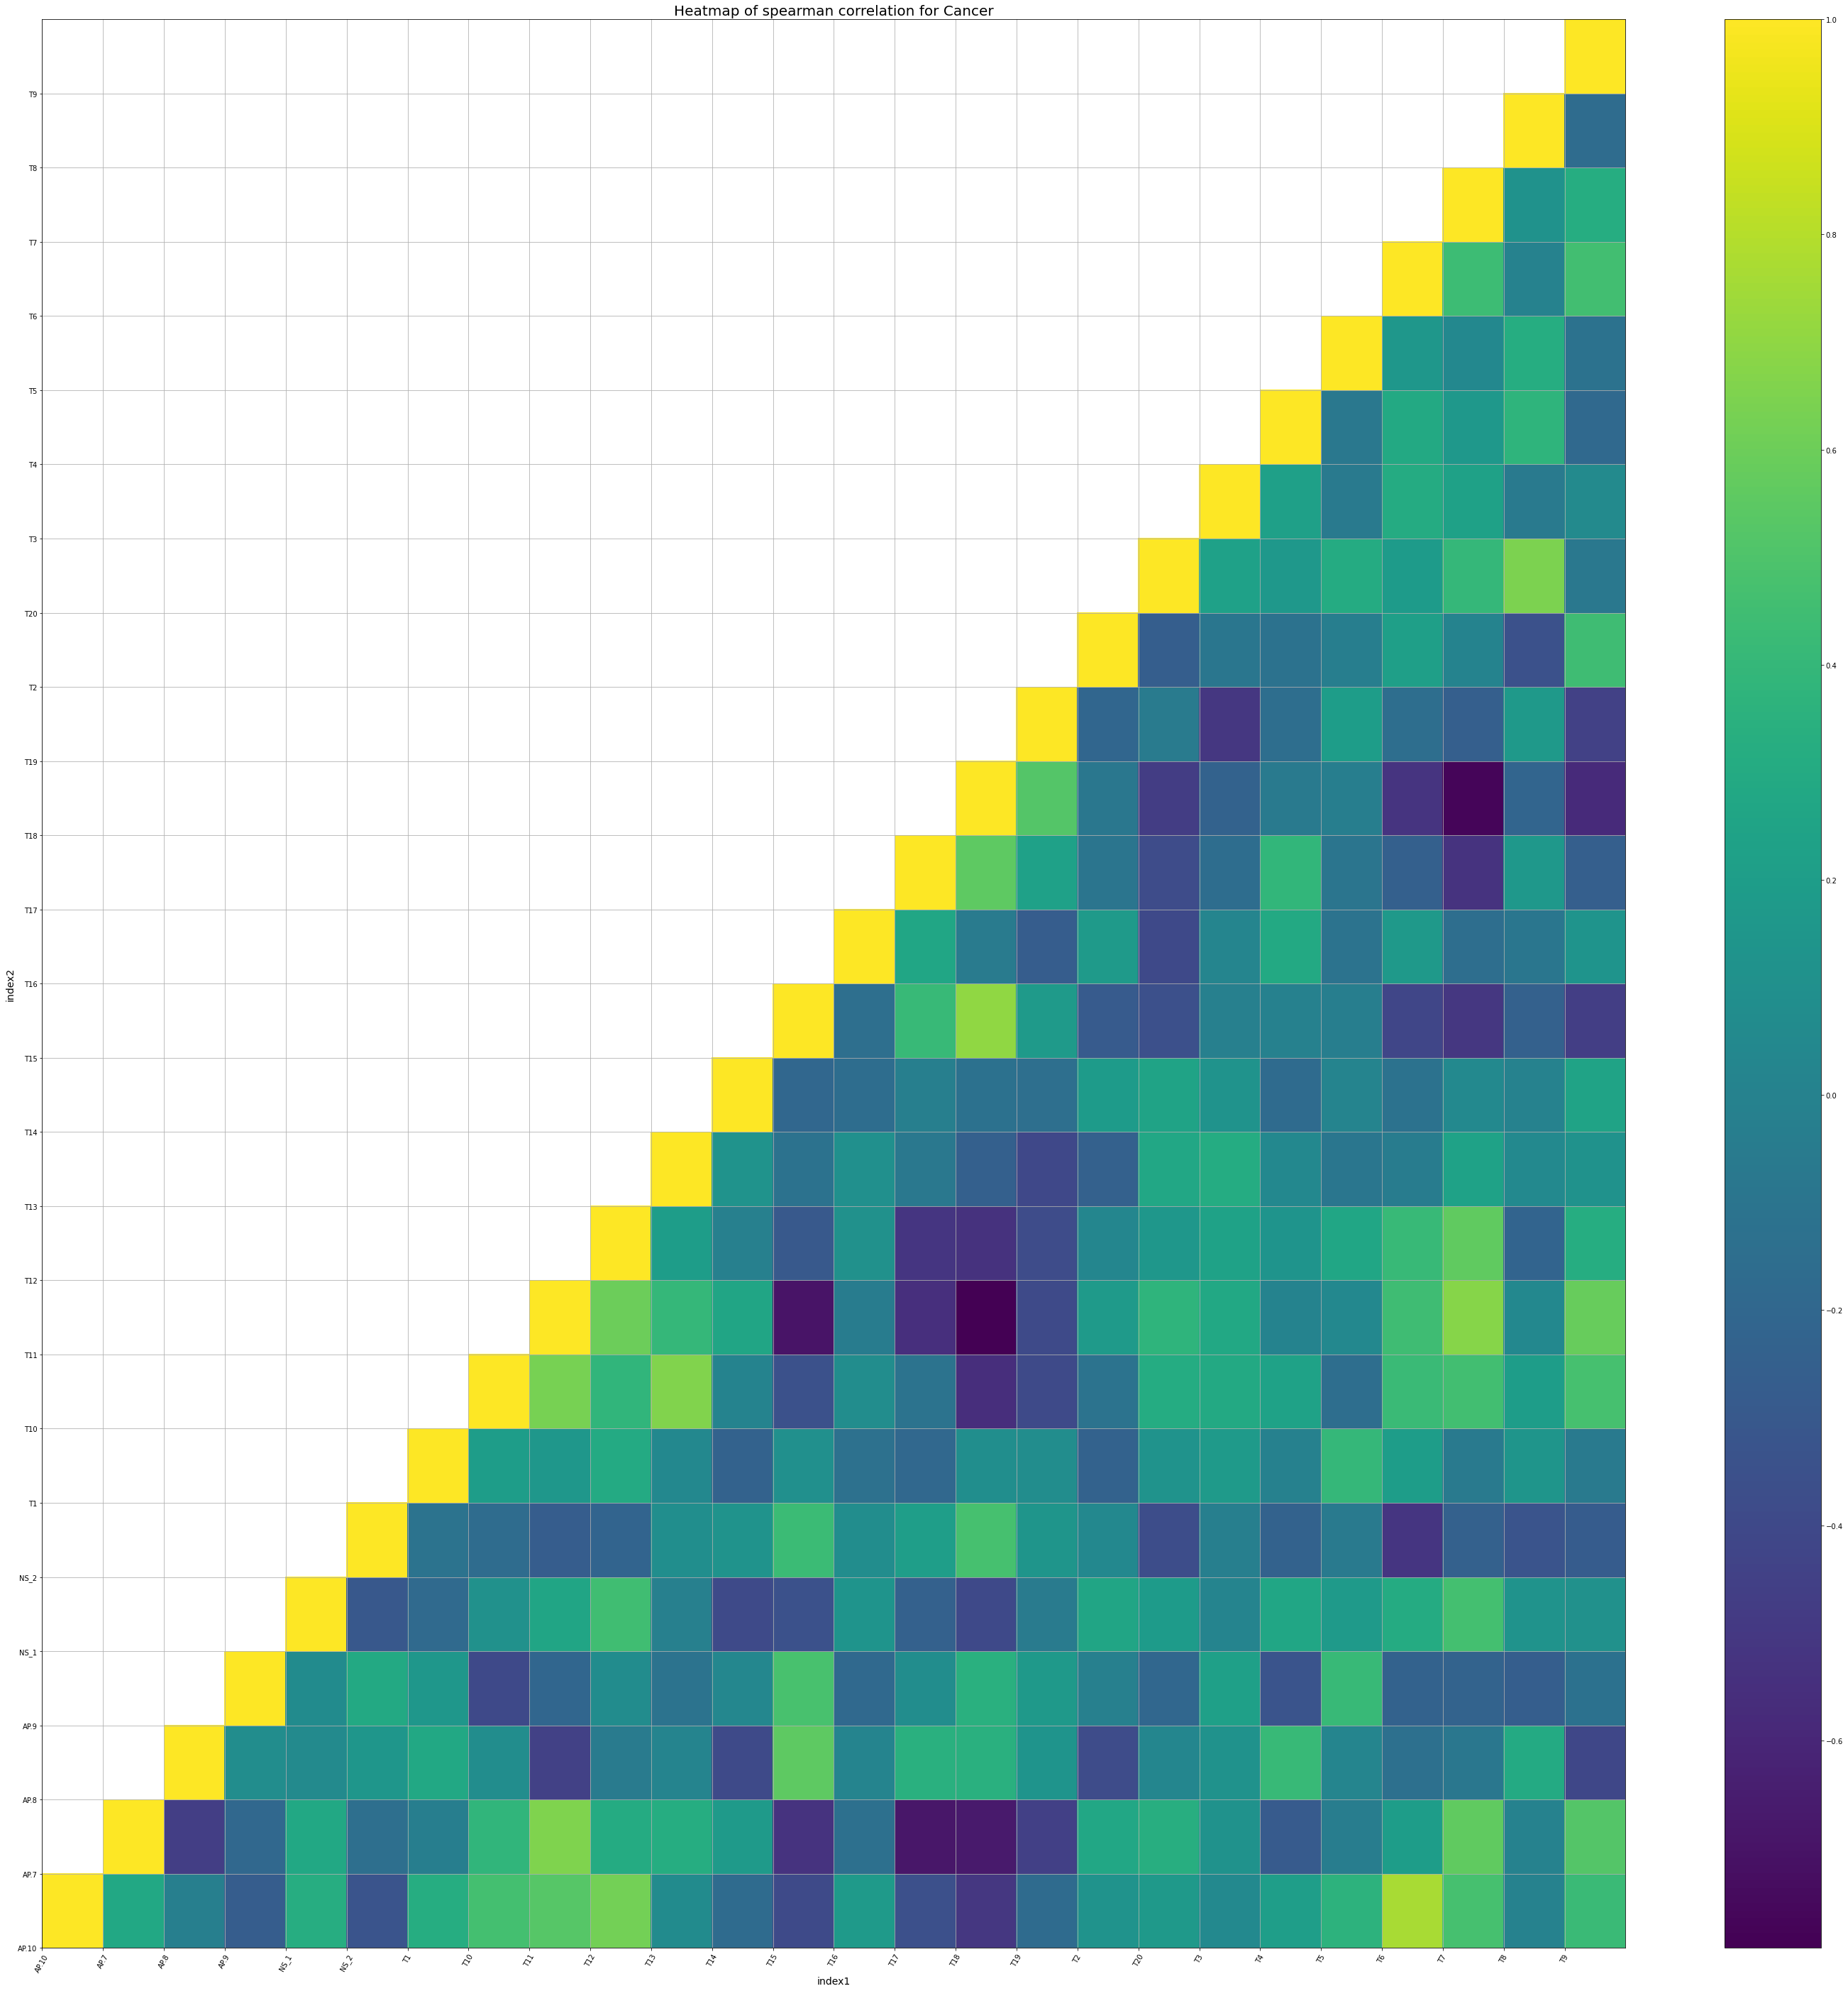

index2,AP.10,AP.7,AP.8,AP.9,NS_1,NS_2,T1,T10,T11,T12,...,T19,T2,T20,T3,T4,T5,T6,T7,T8,T9
index1,,,,,,,,,,,,,,,,,,,,,
AP.10,1.0,0.284786,-0.023590,-0.267692,0.324444,-0.324444,0.318974,0.467350,0.526838,0.618462,...,-0.174701,0.126154,0.171282,0.049573,0.204103,0.357949,0.766154,0.468718,0.003077,0.424274
AP.7,NaN,1.000000,-0.464615,-0.192479,0.283419,-0.146667,-0.032479,0.381880,0.653333,0.301197,...,-0.452308,0.277949,0.331966,0.124103,-0.283419,-0.036581,0.200000,0.561709,0.003077,0.523419
AP.8,NaN,NaN,1.000000,0.077607,0.060513,0.150085,0.284786,0.081709,-0.444103,-0.056410,...,0.134359,-0.381197,0.030427,0.119316,0.413333,0.025641,-0.141197,-0.085128,0.297094,-0.412650
AP.9,NaN,NaN,NaN,1.000000,0.065299,0.290940,0.157607,-0.397607,-0.208889,0.070085,...,0.171966,-0.016068,-0.202051,0.218462,-0.325812,0.416752,-0.232821,-0.230085,-0.261538,-0.126838
NS_1,NaN,NaN,NaN,NaN,1.000000,-0.303248,-0.178120,0.103590,0.259487,0.453675,...,-0.051624,0.261538,0.182222,0.014017,0.266325,0.177436,0.302564,0.464615,0.127521,0.106325
NS_2,NaN,NaN,NaN,NaN,NaN,1.000000,-0.107692,-0.163077,-0.271795,-0.221197,...,0.142564,0.044786,-0.379145,-0.029060,-0.237607,-0.062564,-0.516581,-0.241709,-0.325128,-0.275214
T1,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.198632,0.156239,0.295726,...,0.076923,-0.238291,0.130256,0.174017,-0.012650,0.403761,0.198632,-0.062564,0.139145,-0.060513
T10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.634872,0.381197,...,-0.391453,-0.107009,0.308034,0.288889,0.241709,-0.150085,0.418803,0.457778,0.196581,0.473504
T11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.595214,...,-0.392137,0.175385,0.376410,0.285470,0.011282,0.047521,0.444786,0.677265,0.042735,0.584957


In [191]:
heatmap_spearman(df_spearman_Cancer, 'Cancer')

In [70]:
# spearman 상관계수 구하기 

df_corr_spearman_TA = data_TA.corr(method='spearman')
df_corr_spearman_TA.to_csv("corr_spearman_tubular adenoma.csv") # csv 파일로 correlation 값 저장 
df_corr_spearman_TA

,AD1,AD6,AD10,AD11,AD12,AD13,AD14,AD15,AD16,AD17,...,GSM3305008,GSM3305010,GSM3305020,GSM3305021,GSM3305025,GSM3305050,GSM3305061,GSM3305068,GSM3305084,GSM3305088
AD1,1.000000,0.967716,0.962338,0.939041,0.939508,0.904588,0.973127,0.972112,0.940034,0.953283,...,0.948195,0.933813,0.935477,0.920417,0.874842,0.945992,0.932804,0.868405,0.950228,0.918762
AD6,0.967716,1.000000,0.957010,0.932454,0.929081,0.919460,0.962191,0.952297,0.936579,0.945662,...,0.942226,0.933366,0.935665,0.921647,0.883202,0.939114,0.933165,0.879193,0.948025,0.909667
AD10,0.962338,0.957010,1.000000,0.936461,0.935135,0.912442,0.965772,0.948467,0.956926,0.956090,...,0.938127,0.911224,0.929703,0.903662,0.853080,0.924061,0.914056,0.852513,0.942997,0.883395
AD11,0.939041,0.932454,0.936461,1.000000,0.929669,0.914158,0.944520,0.941776,0.945290,0.933553,...,0.928398,0.917372,0.916654,0.874645,0.845617,0.925349,0.911829,0.856559,0.936790,0.885579
AD12,0.939508,0.929081,0.935135,0.929669,1.000000,0.895288,0.950119,0.954396,0.933706,0.928537,...,0.920173,0.929031,0.902675,0.843670,0.817618,0.920694,0.907397,0.824883,0.930361,0.898697
AD13,0.904588,0.919460,0.912442,0.914158,0.895288,1.000000,0.923427,0.906718,0.922121,0.924256,...,0.918988,0.885490,0.934657,0.890050,0.871063,0.916306,0.930395,0.842415,0.913182,0.867656
AD14,0.973127,0.962191,0.965772,0.944520,0.950119,0.923427,1.000000,0.975446,0.961182,0.965228,...,0.951719,0.944481,0.947848,0.913948,0.880358,0.948492,0.937928,0.874872,0.961128,0.920936
AD15,0.972112,0.952297,0.948467,0.941776,0.954396,0.906718,0.975446,1.000000,0.942195,0.952425,...,0.942325,0.939104,0.935955,0.910867,0.876727,0.949700,0.936502,0.870549,0.949919,0.933205
AD16,0.940034,0.936579,0.956926,0.945290,0.933706,0.922121,0.961182,0.942195,1.000000,0.952798,...,0.924616,0.916748,0.922893,0.876194,0.843332,0.927505,0.909626,0.850853,0.942472,0.877566
AD17,0.953283,0.945662,0.956090,0.933553,0.928537,0.924256,0.965228,0.952425,0.952798,1.000000,...,0.938254,0.913348,0.937847,0.905328,0.863557,0.934606,0.926316,0.852570,0.945211,0.894633


In [71]:
df_corr_spearman_TA[df_corr_spearman_TA<0].count()

AD1           0
AD6           0
AD10          0
AD11          0
AD12          0
AD13          0
AD14          0
AD15          0
AD16          0
AD17          0
AD18          0
GSM3304957    0
GSM3304968    0
GSM3304969    0
GSM3304972    0
GSM3304976    0
GSM3304978    0
GSM3304979    0
GSM3305004    0
GSM3305008    0
GSM3305010    0
GSM3305020    0
GSM3305021    0
GSM3305025    0
GSM3305050    0
GSM3305061    0
GSM3305068    0
GSM3305084    0
GSM3305088    0
dtype: int64

In [151]:
df_spearman_TA = spear_df(sort_df(data_TA))
df_spearman_TA.to_csv("corr_spearman_pval_tubular_adenoma.csv")
df_spearman_TA.head()

,spearman,pvalue,index1,index2
0,1.000000,8.376948e-209,AD1,AD1
1,-0.527586,3.269614e-03,AD1,AD10
2,0.223153,2.445864e-01,AD1,AD11
3,-0.222167,2.467298e-01,AD1,AD12
4,-0.047783,8.055721e-01,AD1,AD13


In [73]:
df_spearman_TA[df_spearman_TA['spearman']>0]

,spearman,pvalue,index1,index2
0,1.000000,8.376948e-209,AD1,AD1
2,0.223153,2.445864e-01,AD1,AD10
6,0.237438,2.148903e-01,AD1,AD14
7,0.223153,2.445864e-01,AD1,AD15
8,0.089655,6.437201e-01,AD1,AD16
...,...,...,...,...
430,0.047783,8.055721e-01,GSM3305068,GSM3305084
431,0.336946,7.387694e-02,GSM3305068,GSM3305088
432,1.000000,8.376948e-209,GSM3305084,GSM3305084
433,0.207389,2.803697e-01,GSM3305084,GSM3305088


In [74]:
remove_noise(data_TA, df_spearman_TA)

df_spearman 크기:  (435, 4)
df_noise 크기:  (367, 4)
df_noise에 해당되는 샘플: {'AD12', 'AD6', 'GSM3304972', 'GSM3305068', 'GSM3305088', 'GSM3304976', 'GSM3304978', 'GSM3305050', 'GSM3304979', 'AD11', 'AD15', 'AD16', 'AD13', 'GSM3305025', 'GSM3305010', 'GSM3305084', 'GSM3305008', 'AD18', 'AD10', 'AD1', 'GSM3304957', 'GSM3305021', 'GSM3304969', 'AD14', 'AD17', 'GSM3305004', 'GSM3305020', 'GSM3305061', 'GSM3304968'}
df_combined (original)인 전체 샘플: {'AD12', 'AD6', 'GSM3304972', 'GSM3305068', 'GSM3305088', 'GSM3304976', 'GSM3304978', 'GSM3305050', 'GSM3304979', 'AD11', 'AD15', 'AD16', 'AD13', 'GSM3305025', 'GSM3305010', 'GSM3305084', 'GSM3305008', 'AD18', 'AD10', 'AD1', 'GSM3304957', 'GSM3305021', 'GSM3304969', 'AD14', 'AD17', 'GSM3305004', 'GSM3305020', 'GSM3305061', 'GSM3304968'}


[]

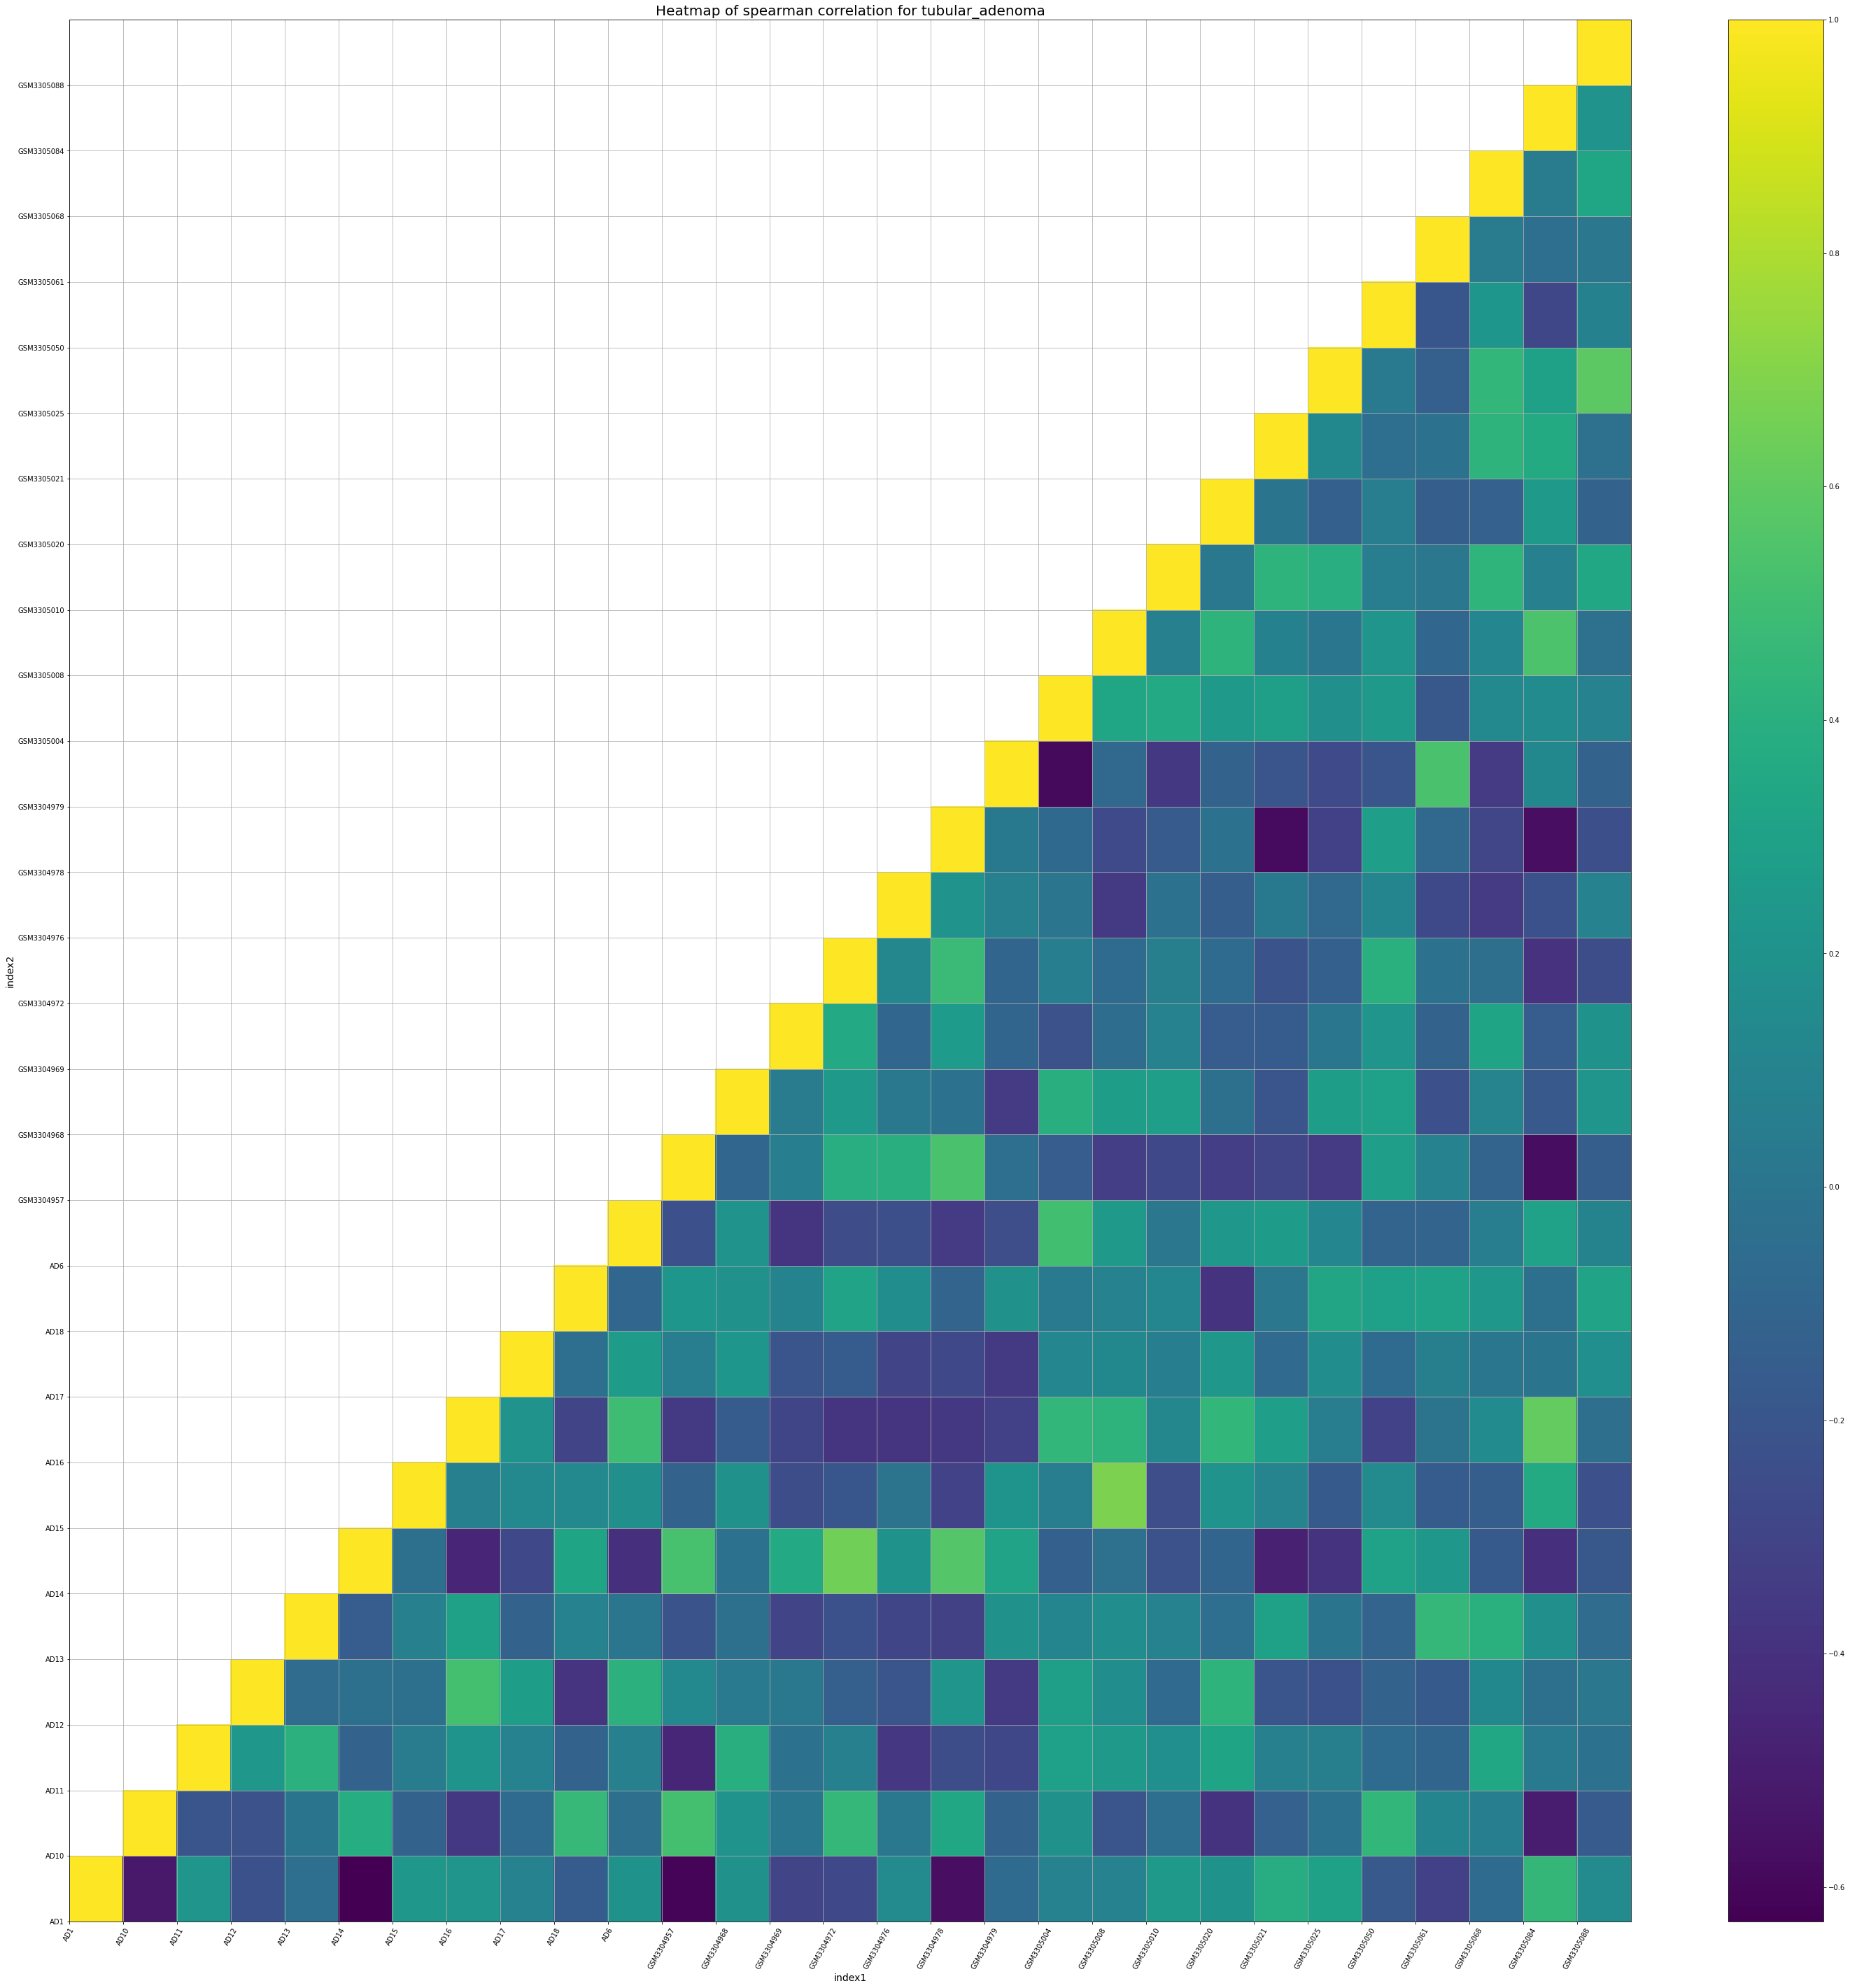

index2,AD1,AD10,AD11,AD12,AD13,AD14,AD15,AD16,AD17,AD18,...,GSM3305008,GSM3305010,GSM3305020,GSM3305021,GSM3305025,GSM3305050,GSM3305061,GSM3305068,GSM3305084,GSM3305088
index1,,,,,,,,,,,,,,,,,,,,,
AD1,1.0,-0.527586,0.223153,-0.222167,-0.047783,-0.629557,0.237438,0.223153,0.089655,-0.161576,...,0.090640,0.250246,0.198030,0.386207,0.299015,-0.180788,-0.319704,-0.068473,0.448768,0.143842
AD10,NaN,1.000000,-0.205911,-0.218719,-0.002956,0.377340,-0.117241,-0.364532,-0.068473,0.460099,...,-0.198030,-0.045320,-0.389655,-0.128571,-0.013793,0.443350,0.108867,0.059113,-0.507882,-0.168966
AD11,NaN,NaN,1.000000,0.236453,0.413300,-0.114778,0.040887,0.216749,0.086700,-0.126601,...,0.252709,0.174877,0.321675,0.074384,0.067488,-0.066995,-0.105911,0.339409,0.033005,-0.018227
AD12,NaN,NaN,NaN,1.000000,-0.060099,-0.032512,-0.035468,0.514778,0.272414,-0.385222,...,0.164532,-0.069951,0.421182,-0.200000,-0.223645,-0.124631,-0.174877,0.133990,-0.033990,0.015764
AD13,NaN,NaN,NaN,NaN,1.000000,-0.156650,0.076355,0.298522,-0.122660,0.086207,...,0.169458,0.084236,-0.050246,0.299507,-0.005419,-0.107882,0.455665,0.401970,0.184236,-0.059113
AD14,NaN,NaN,NaN,NaN,NaN,1.000000,-0.032512,-0.461576,-0.273399,0.322167,...,-0.027094,-0.221182,-0.103941,-0.478325,-0.388177,0.308374,0.240394,-0.177340,-0.403448,-0.189655
AD15,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.073399,0.135961,0.134975,...,0.678325,-0.244335,0.207882,0.106897,-0.177340,0.144828,-0.160591,-0.151724,0.358128,-0.233005
AD16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.205419,-0.301478,...,0.425123,0.122167,0.442365,0.277340,0.055172,-0.305911,-0.011330,0.147291,0.611330,-0.042365
AD17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.049261,...,0.132020,0.058128,0.231034,-0.072906,0.169458,-0.068966,0.067488,0.008374,-0.003941,0.176355


In [192]:
heatmap_spearman(df_spearman_TA, 'tubular_adenoma')

<b> 샘플 -> 숫자 매핑 </b>

In [75]:
num=1
for i in combine_sampleName:
    print(i)
    predict.loc[predict["predict"] == i,:] = num
    num =num+1
print(num)
predict.head(50)

adenovillous polyp
sessile serrated adenoma
serrated adenoma
TSA
villoglandular polyp
Tubulovillous adenoma
Cancer
healthy colonic tissue
tubular adenoma
FAP
adenomatous polyp
HP
13


C:\anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,predict
N1,8
N2,8
N3,8
N4,8
N5,8
N6,8
N7,8
N8,8
N9,8
N10,8


<b> Kmeans 수행 </b>

In [88]:
# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(data)

# concatenate labels to df as a new column
r = pd.concat([data, predict],axis=1)

print(r)
r.tail()

                 1        10       100     10000  100009676     10001  \
N1        3.261926  5.542344  3.871889  3.798965   3.301909  4.530116   
N2        3.067170  5.769222  3.409645  4.053349   3.064216  4.570496   
N3        2.874421  6.154989  3.157981  4.017963   3.360651  4.594367   
N4        3.604518  5.178568  3.842628  3.292021   3.171118  4.258140   
N5        3.782860  5.516549  3.713573  3.300287   4.080469  4.280303   
...            ...       ...       ...       ...        ...       ...   
SSA.P.17  3.168203  5.081238  4.153700  3.908562   3.001588  4.820424   
SSA.P.18  3.410563  5.201103  4.187524  3.360113   3.153917  4.409013   
SSA.P.19  3.406845  5.773570  3.531418  3.018848   3.639411  4.293574   
SSA.P.20  4.509260  5.044354  4.378324  2.642289   3.138742  4.623012   
SSA.P.21  2.730068  4.509664  3.548250  3.175807   3.477712  4.862594   

             10003     10004  100048912  100049716  ...      9985      9986  \
N1        1.508158  4.371698   3.855534   3.

,1,10,100,10000,100009676,10001,10003,10004,100048912,100049716,...,9985,9986,9987,9988,9989,999,9990,9993,9994,predict
SSA.P.17,3.168203,5.081238,4.153700,3.908562,3.001588,4.820424,2.375645,4.338708,2.365043,4.184505,...,4.138788,5.260717,7.384413,6.669456,7.059780,9.732668,5.865699,5.975860,4.325534,2
SSA.P.18,3.410563,5.201103,4.187524,3.360113,3.153917,4.409013,1.234972,4.013469,3.833025,4.610452,...,3.597399,5.916054,6.762080,5.888897,5.929257,9.333012,5.110429,6.639432,3.561905,2
SSA.P.19,3.406845,5.773570,3.531418,3.018848,3.639411,4.293574,1.231854,3.649411,2.929373,4.054895,...,4.221285,5.698377,6.888883,5.851999,6.271824,9.875977,5.694509,6.718095,3.601179,2
SSA.P.20,4.509260,5.044354,4.378324,2.642289,3.138742,4.623012,1.817323,4.769140,4.351938,4.410926,...,4.085452,6.499885,6.110657,4.823076,5.800136,9.183178,3.784187,6.986361,2.433076,2
SSA.P.21,2.730068,4.509664,3.548250,3.175807,3.477712,4.862594,1.629351,4.782584,2.797801,3.911247,...,4.495704,5.875531,6.724426,5.662410,7.044568,10.018633,5.732676,6.664638,4.152600,2


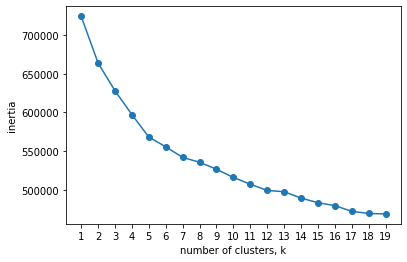

In [89]:
ks = range(1,20)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(r)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

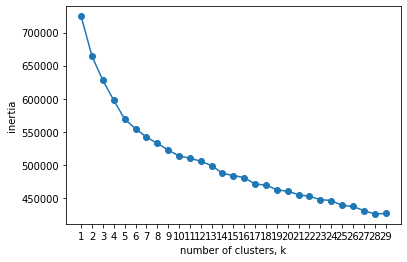

In [90]:
ks = range(1,30)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(r)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

model = KMeans(n_clusters=14)
model.fit(r)

centers = pd.DataFrame(model.cluster_centers_)
center_x = centers[0]
center_y = centers[1]

plt.scatter(center_x,center_y,s=20,marker='D',c='r')
plt.show()

### PCA 수행
https://ssungkang.tistory.com/entry/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5-PCA-2-python-%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-PCA-%EC%8B%A4%EC%8A%B5 참고

In [91]:
X=data.to_numpy()

In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

pca=PCA() #주성분 개수 지정하지 않고 클래스생성
pca.fit(X)  #주성분 분석
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_d = np.argmax(cumsum >= 0.95) + 1 # 분산의 설명량이 95%이상 되는 차원의 수
num_d

182

http://textmining.kr/?p=362

In [93]:
pca = PCA(n_components = 0.95)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents)

principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,-24.553686,-15.015256,-5.831985,16.482608,-6.824852,-1.089348,-8.464772,1.692172,-2.058985,7.538832,...,-0.426893,-0.768461,-0.561411,1.165550,0.985727,-1.429772,-1.821885,-0.171710,-1.368632,0.121021
1,-25.693020,-9.528142,-10.548766,16.507131,-10.318700,2.238103,0.674255,0.170031,1.498166,8.710122,...,1.056524,0.912954,0.521402,0.050387,-0.190006,-0.310618,-0.542915,-1.520767,1.486780,0.122532
2,-28.868225,-19.467795,-4.592718,11.316603,-3.060169,-8.172802,-3.670357,-2.333017,-2.352499,3.636330,...,1.816342,1.145822,-0.679539,-0.500959,-0.311539,-0.186828,1.566382,2.294831,-0.266609,0.438142
3,-40.097422,13.818822,6.249908,-1.348040,3.469031,-2.728407,-4.220491,-8.264833,0.554320,-6.210850,...,0.469449,0.993128,1.470901,-0.386907,0.150276,0.299350,0.792087,0.322922,-0.568536,0.397358
4,-38.785701,11.375474,-1.382093,1.055907,-2.043562,2.978032,2.238370,-8.545329,2.491071,-5.504408,...,0.197735,0.926956,3.205617,-0.502877,-0.507123,0.112172,-0.151523,-1.586798,1.263161,0.335960


In [94]:
y=pd.DataFrame(r['predict'].tolist())
y.columns=['predict']
y.head()

,predict
0,8
1,8
2,8
3,8
4,8


In [95]:
finalDataFrame =pd.concat([principalDf, y], axis=1)
finalDataFrame.head()

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,predict
0,-24.553686,-15.015256,-5.831985,16.482608,-6.824852,-1.089348,-8.464772,1.692172,-2.058985,7.538832,...,-0.768461,-0.561411,1.165550,0.985727,-1.429772,-1.821885,-0.171710,-1.368632,0.121021,8
1,-25.693020,-9.528142,-10.548766,16.507131,-10.318700,2.238103,0.674255,0.170031,1.498166,8.710122,...,0.912954,0.521402,0.050387,-0.190006,-0.310618,-0.542915,-1.520767,1.486780,0.122532,8
2,-28.868225,-19.467795,-4.592718,11.316603,-3.060169,-8.172802,-3.670357,-2.333017,-2.352499,3.636330,...,1.145822,-0.679539,-0.500959,-0.311539,-0.186828,1.566382,2.294831,-0.266609,0.438142,8
3,-40.097422,13.818822,6.249908,-1.348040,3.469031,-2.728407,-4.220491,-8.264833,0.554320,-6.210850,...,0.993128,1.470901,-0.386907,0.150276,0.299350,0.792087,0.322922,-0.568536,0.397358,8
4,-38.785701,11.375474,-1.382093,1.055907,-2.043562,2.978032,2.238370,-8.545329,2.491071,-5.504408,...,0.926956,3.205617,-0.502877,-0.507123,0.112172,-0.151523,-1.586798,1.263161,0.335960,8


In [96]:
labels = []
yList = y.values.tolist()
for label in yList:
    if label[0] not in labels:
        labels.append(label[0])
    
labels

[8, 1, 11, 6, 2, 9, 4, 10, 7, 3, 5, 12]

In [97]:
sortedLabels=sorted(labels)
sortedLabels

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

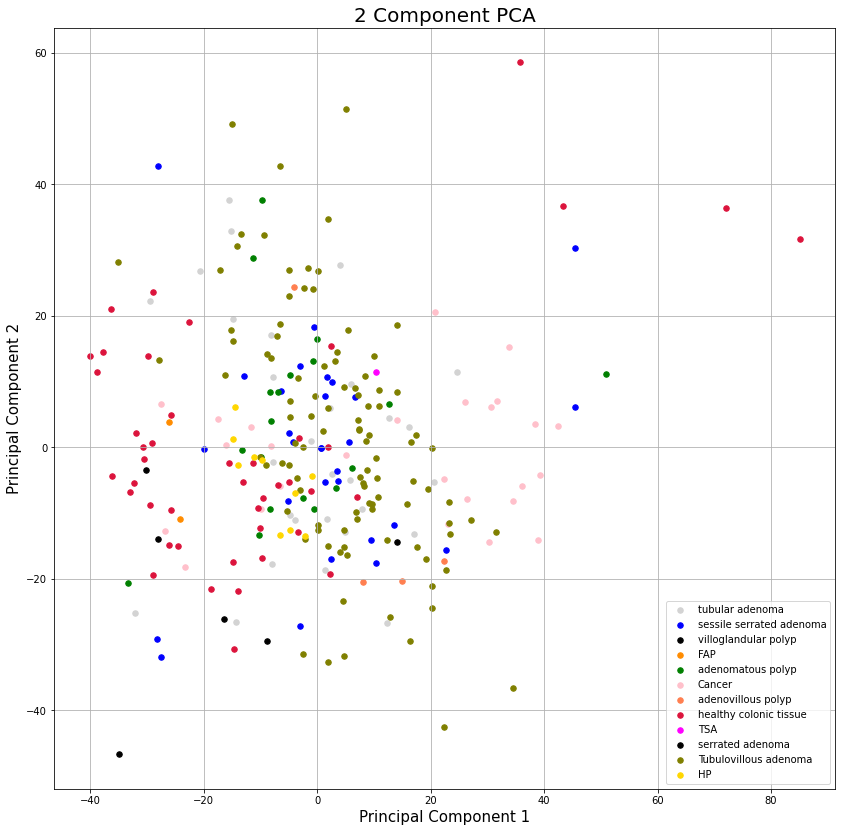

In [100]:
fig = plt.figure(figsize = (14,14))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

'''
colors = ["black","grey","lightgray","lightcoral","maroon",
         "mistyrose","coral","peachpuff","darkorange","darkgoldenrod",
         "olive","yellowgreen","lawngreen","lightgreen","g",
         "mediumseagreen","mediumaquamarine","darkslategray","c","cadetblue",
         "dodgerblue","slategrey","darkblue","rebeccapurple","crimson",
          "fuchsia"]
'''
colors=["lightgray", "blue", "black", "darkorange", "green", "pink", 
        "coral", "crimson", "fuchsia", "black", "olive", "gold", "red"]

for label, color in zip(sortedLabels, colors):
    indicesToKeep = finalDataFrame['predict'] == label
    ax.scatter(
        finalDataFrame.loc[indicesToKeep, 0]
               , finalDataFrame.loc[indicesToKeep, 1]
              
               , c = color
               , s = 30
              )

ax.legend(combine_sampleName)
ax.grid()
plt.savefig("only-PCA.png")

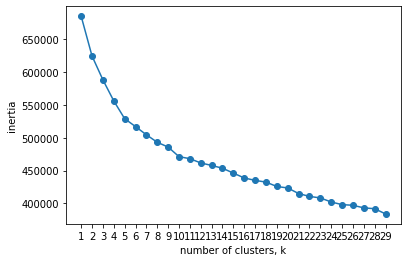

In [101]:
ks = range(1,30)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(principalDf)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [102]:
model = KMeans(n_clusters=10)
model.fit(principalDf)
centers = pd.DataFrame(model.cluster_centers_)
print(centers.shape)
centers.head()

(10, 182)


,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,2.559326,6.507774,-1.363135,-2.045971,2.733876,-0.449029,-3.614844,1.798284,-0.521808,0.261401,...,-0.264031,-0.209147,0.125895,0.113588,0.161175,0.034808,0.079508,0.138725,0.126722,0.410146
1,-15.241590,3.973875,-15.152541,-0.284684,19.578829,5.576902,5.465115,6.232278,2.255888,2.962382,...,-0.154913,-0.000807,-0.035825,-0.151360,-0.236211,0.159931,-0.073535,-0.128584,0.344555,-0.206542
2,-29.388228,5.874144,-0.643068,5.852689,-2.460029,0.993946,-2.874312,-3.452924,1.739432,-0.869022,...,0.217239,0.248709,0.478251,-0.250393,0.246055,-0.032652,-0.071985,0.149064,0.216010,-0.162634
3,-6.690221,-12.426062,-10.895731,6.175108,-1.510475,-2.099903,-1.695704,-1.370713,-1.051526,-1.076062,...,0.195426,-0.098291,0.031826,0.321666,-0.194053,0.059824,0.031701,-0.193135,-0.395685,-0.018660
4,36.671796,9.073199,3.365854,13.572412,3.232700,-2.585498,4.516032,-1.396751,3.490660,-0.332332,...,0.047226,-0.036124,-0.082714,-0.161127,0.062219,-0.116646,-0.042240,0.196451,0.012602,-0.021027


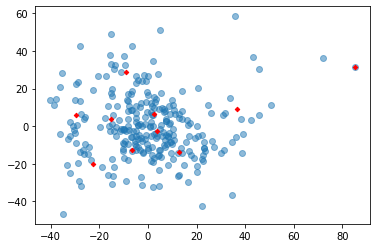

In [103]:
centers = pd.DataFrame(model.cluster_centers_)
center_x = centers[0]
center_y = centers[1]

# scatter plot
plt.scatter(finalDataFrame[0],finalDataFrame[1], alpha=0.5)#c=finalDataFrame['predict']
plt.scatter(center_x,center_y,s=10,marker='D',c='r')
plt.show()

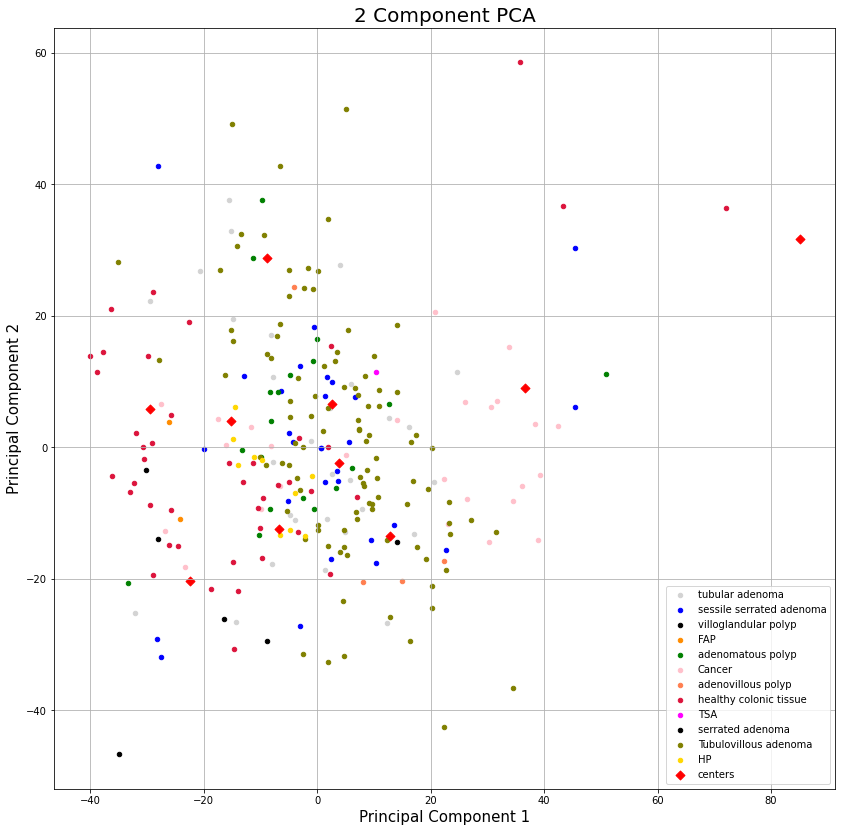

In [107]:
fig = plt.figure(figsize = (14,14))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

'''
colors = ["black","grey","lightgray","lightcoral","maroon",
         "mistyrose","coral","peachpuff","darkorange","darkgoldenrod",
         "olive","yellowgreen","lawngreen","lightgreen","g",
         "mediumseagreen","mediumaquamarine","darkslategray","c","cadetblue",
         "dodgerblue","slategrey","darkblue","rebeccapurple","crimson",
          "fuchsia"]
'''

colors=["lightgray", "blue", "black", "darkorange", "green", "pink", 
        "coral", "crimson", "fuchsia", "black", "olive", "gold", "red"]

for label, color in zip(sortedLabels, colors):
    indicesToKeep = finalDataFrame['predict'] == label
    ax.scatter(
        finalDataFrame.loc[indicesToKeep, 0]
               , finalDataFrame.loc[indicesToKeep, 1]
              
               , c = color
               , s = 20
              )

    
centers = pd.DataFrame(model.cluster_centers_)
center_x = centers[0]
center_y = centers[1]

# scatter plot
plt.scatter(center_x,center_y,s=40,marker='D',c='r')

labels=combine_sampleName+["centers"]
ax.legend(labels)
plt.savefig("PCA+IKM.png")
ax.grid()